This project is presented by Racheli Cohen(315247411) and Shayna Shaw(317807451)<br><br>
<B>$28.6 billion was lost to fraud worldwide in 2020, according to Nilson Report.<B>

As long as there’s been currency, there’s been fraud. But not until the 21st century was it so easy for fraudsters to engage in illicit activity, reap the rewards, and evade prosecution and incarceration for their crimes.

Recently, my grandmother went to do her weekly shop at the grocery store, but when she got to the cash register to pay, her credit card didn't go through. From an investigation, it was discovered that there had been a huge transaction from her account, putting her account in a big negative and blocking the use of the card. Finally it turned out that in the same week she donated 1000 dollars to charity, but the clerk who made the transfer accidently transfered 100000 dollars... well, this time it was taken care of and the mistake was corrected Baruch Hashem, but what about all the other cases?? all the times that it is done on purpose and not by accident? This is where we got the idea of our project from, we want to do what we can to help detect and avoid fraud transactions!

In a survey of more than 5,000 respondents across 99 global territories in 2020, PricewaterhouseCoopers (PwC) found that 47 percent had suffered at least one form of fraud in the prior 24 months—averaging six per company. These were commonly customer fraud, cybercrime, asset misappropriation, and bribery and corruption, which cost $42 billion. 

    
We Racheli Cohen and Shayna Shaw In this project will try to tackle this problem and help it by creating an Autoencoder Neural Network (implemented in Keras) for Anomaly Detection in credit card transaction data. The trained model will be evaluated on pre-labeled and anonymized dataset.

Let’s dive deeper in!

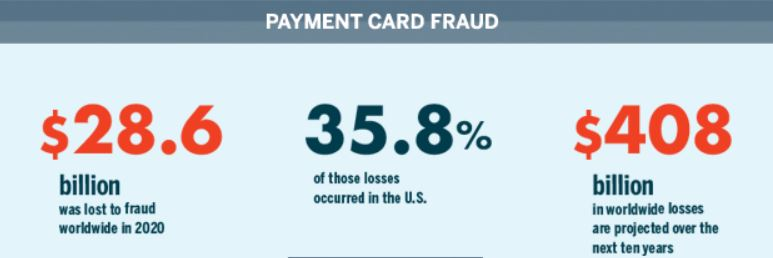

<br>
<h2>Imports

In [1]:
# DataFrame, data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Tensorflow + Keras
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np # linear algebra
import os
from collections import Counter
import logging
import time
import pickle
import itertools
from scipy import stats
import seaborn as sns
from pylab import rcParams


<h2><b>Loading the data set<b>


The dataset we are going to be using can be downloaded from Kaggle:<br> 
https://www.kaggle.com/datasets/kartik2112/fraud-detection<br>
This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.<br>

Here is what our data containes:<br>
<b>trans_date_trans_time</b> - contains the transaction time stamp<br>
<b>cc_num</b> - contains the credit card number<br>
<b>merchant</b> - contains the merchant name<br>
<b>category</b> - contains the transaction category<br>
<b>amt</b> - contains the transaction amount<br>
<b>first</b> - contains the card holders first name<br>
<b>last</b> - contains the card holders last name<br>
<b>street</b> - contains the transaction address<br>
<b>city</b> - contains the transaction city<br>
<b>state</b> - contains the transaction state<br>
<b>zip</b> - contains the transaction zipcode<br>
<b>lat</b> - contains the transaction lattitude<br>
<b>long</b> - contains the transaction longitude<br>
<b>city_pop</b> - contains the population of the city<br>
<b>job</b> - contains the card holders job<br>
<b>dob</b> - contains the card holders date of birth<br>
<b>trans_num</b> - contains the transaction number<br>
<b>unix_time</b> - contains the time in unix format<br>
<b>merch_lat</b> - contains the  lattitude of the merchant<br>
<b>merch_long</b> - contains the longitude of merchant<br>
<b>is_fraud - contains whether the transaction is fraud or not</b><br>

these are going to be the features that we will work with.

In [2]:
#load dataset

Train_dataset_path = "Input/fraudTrain.csv"
Test_dataset_path = "Input/fraudTest.csv"

print("Open file:", Train_dataset_path)
print("Open file:", Test_dataset_path)

df1 = pd.read_csv(Train_dataset_path)
df2 = pd.read_csv(Test_dataset_path)

#amount of training and testing data
print(df1.shape)
print(df2.shape)


Open file: Input/fraudTrain.csv
Open file: Input/fraudTest.csv
(1296675, 23)
(555719, 23)


Lets take a sneak peek at what our Train data looks like, we can see the columns as explained above.

In [3]:
#concatenating the two datasets
df = pd.concat([df1, df2]).reset_index()
#remove unnamed column
df.drop(df.columns[:2], axis=1, inplace=True)

df.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      lat      long  \
0                561 Perry Cove  Moravian Falls  ...  36.0788  -81.1781   
1  43039 Riley Greens Suite 393          Orient  ...  48.8878 -118.2105   
2      594 White Dale Suite 530      Malad City  ...  42.1808 -112.2620   
3   9443 Cynthia Court Apt. 038         Boulder  ...  46.2306 -112.1138   
4              408 Bradley Rest        Doe Hill  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 22 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

<h2><b>Pre-process our data

We can see that the trans_date_trans_time and dob are of type object, we will convert that columns into datetime format


In [5]:
#convert trans_date_trans_time, and dob column into datetime format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time             

In [6]:
df.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      lat      long  \
0                561 Perry Cove  Moravian Falls  ...  36.0788  -81.1781   
1  43039 Riley Greens Suite 393          Orient  ...  48.8878 -118.2105   
2      594 White Dale Suite 530      Malad City  ...  42.1808 -112.2620   
3   9443 Cynthia Court Apt. 038         Boulder  ...  46.2306 -112.1138   
4              408 Bradley Rest        Doe Hill  ...  38.4207  -79.4629   

   city_pop                                job        dob  \
0      3495          Psychologist, counselling 1988-03-09   
1       149  Special educational needs teacher 1978-06-21   
2      4154        Nature conservation officer 1962-01-19   
3      1939                    Patent attorney 1967-01-12   
4        99     Dance movement psychotherapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 22 columns]

<br>Check for NULL values in our data

In [7]:
df.isnull().values.any()

False

we will now separate the trans_date_trans_time column into hour, day, and Month-year, in order to get more information from the column. we will then attach these additonal columns to our original dataframe

In [8]:
#derive hour
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
#derive day
df['trans_day_of_week'] = df['trans_date_trans_time'].dt.day_name()
#derive year and month
df['trans_year_month'] = df['trans_date_trans_time'].dt.to_period('M')

df.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...  \
0                561 Perry Cove  Moravian Falls  ...   
1  43039 Riley Greens Suite 393          Orient  ...   
2      594 White Dale Suite 530      Malad City  ...   
3   9443 Cynthia Court Apt. 038         Boulder  ...   
4              408 Bradley Rest        Doe Hill  ...   

                                 job        dob  \
0          Psychologist, counselling 1988-03-09   
1  Special educational needs teacher 1978-06-21   
2        Nature conservation officer 1962-01-19   
3                    Patent attorney 1967-01-12   
4     Dance movement psychotherapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

  is_fraud trans_hour  trans_day_of_week  trans_year_month  
0        0          0            Tuesday           2019-01  
1        0          0            Tuesday           2019-01  
2        0          0            Tuesday           2019-01  
3        0          0            Tuesday           2019-01  
4        0          0            Tuesday           2019-01  

[5 rows x 25 columns]

Lets find the age of the customer at the time of transacting

In [9]:
df['age'] = np.round((df['trans_date_trans_time'] - df['dob'])/np.timedelta64(1, 'Y'))
df.age.head()

0    31.0
1    41.0
2    57.0
3    52.0
4    33.0
Name: age, dtype: float64

Now, since we have extracted separate variables from the 'trans_date_trans_time' column, it is safe to drop the column, since it does not provide us any additonal information.
And, since we have also extracted the age of the customers, we can safely remove the 'dob' variable too since it does not provide us any additonal information in this context.
Also, the variables 'first', 'last' contain personally identifiable information. These features cause privacy concerns and moreover are not necessary in the context of our analysis. Therefore, we will drop these variables too.

In [10]:
#drop variables
df.drop('trans_date_trans_time', axis=1, inplace=True)
df.drop('first', axis=1, inplace=True)
df.drop('last', axis=1, inplace=True)
df.drop('dob', axis=1, inplace=True)

Now that our dataframe has only the required data, we will now proceed to the Data processing step, i.e., handling missing values, encoding variables and scaling variables wherever required.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column             Dtype    
---  ------             -----    
 0   cc_num             int64    
 1   merchant           object   
 2   category           object   
 3   amt                float64  
 4   gender             object   
 5   street             object   
 6   city               object   
 7   state              object   
 8   zip                int64    
 9   lat                float64  
 10  long               float64  
 11  city_pop           int64    
 12  job                object   
 13  trans_num          object   
 14  unix_time          int64    
 15  merch_lat          float64  
 16  merch_long         float64  
 17  is_fraud           int64    
 18  trans_hour         int64    
 19  trans_day_of_week  object   
 20  trans_year_month   period[M]
 21  age                float64  
dtypes: float64(6), int64(6), object(9), period[M](1)
memory usage: 310

In [12]:
df.shape

(1852394, 22)

In [13]:
#describe the dataset
df.describe()

cc_num           amt           zip           lat          long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01 -9.022783e+01   
std    1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00  1.374789e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01 -9.679800e+01   
50%    3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01  5.210015e-03   
std    3.014876e+05  1.819508e+07  5.105604e+00  1.375969e+01  7.199217e-02   
min    2.300000e+01  1.325376e+09  1.902742e+01 -1.666716e+02  0.000000e+00   
25%    7.410000e+02  1.343017e+09  3.474012e+01 -9.689944e+01  0.000000e+00   
50%    2.443000e+03  1.357089e+09  3.936890e+01 -8.744069e+01  0.000000e+00   
75%    2.032800e+04  1.374581e+09  4.195626e+01 -8.024511e+01  0.000000e+00   
max    2.906700e+06  1.388534e+09  6.751027e+01 -6.695090e+01  1.000000e+00   

         trans_hour           age  
count  1.852394e+06  1.852394e+06  
mean   1.280612e+01  4.626617e+01  
std    6.815753e+00  1.741239e+01  
min    0.000000e+00  1.400000e+01  
25%    7.000000e+00  3.300000e+01  
50%    1.400000e+01  4.400000e+01  
75%    1.900000e+01  5.700000e+01  
max    2.300000e+01  9.600000e+01

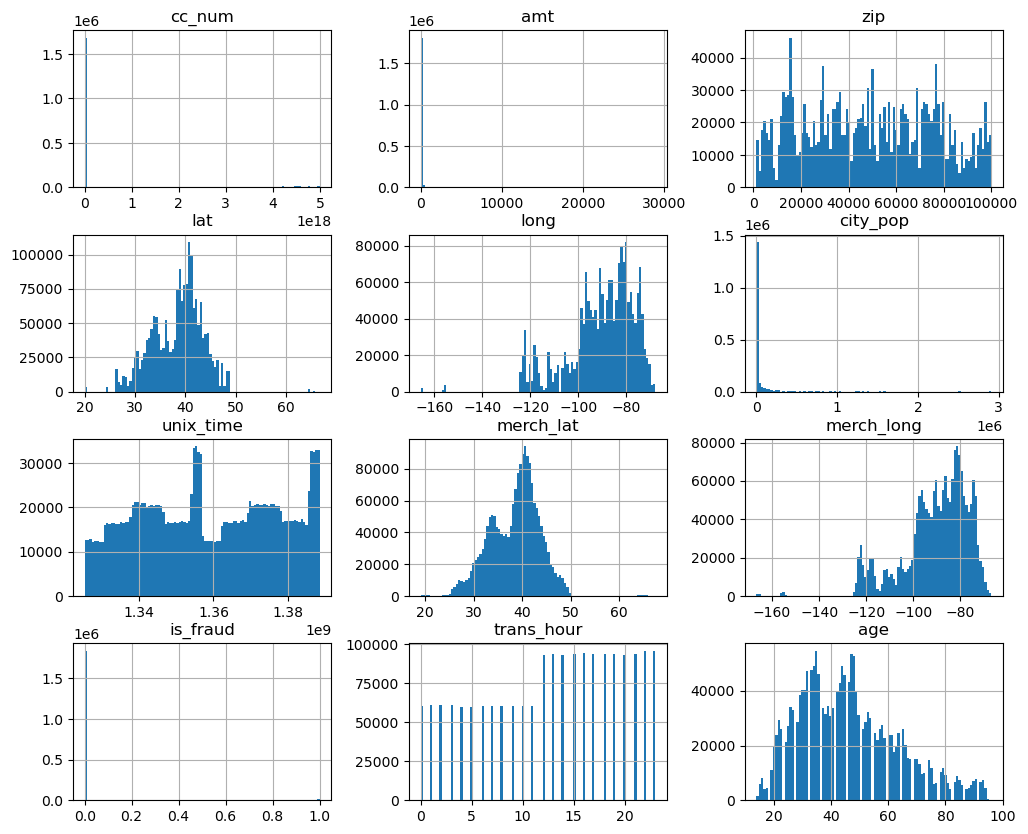

In [14]:
df.hist(bins=100, figsize=(12,10))
plt.show()

Check relationship between features and target

Note: From heatmap amount has highly correlated with is_fraud

(Heatmap if value close to 1 and color close to white meaning 2 features have highly correlated)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14360\2200535733.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


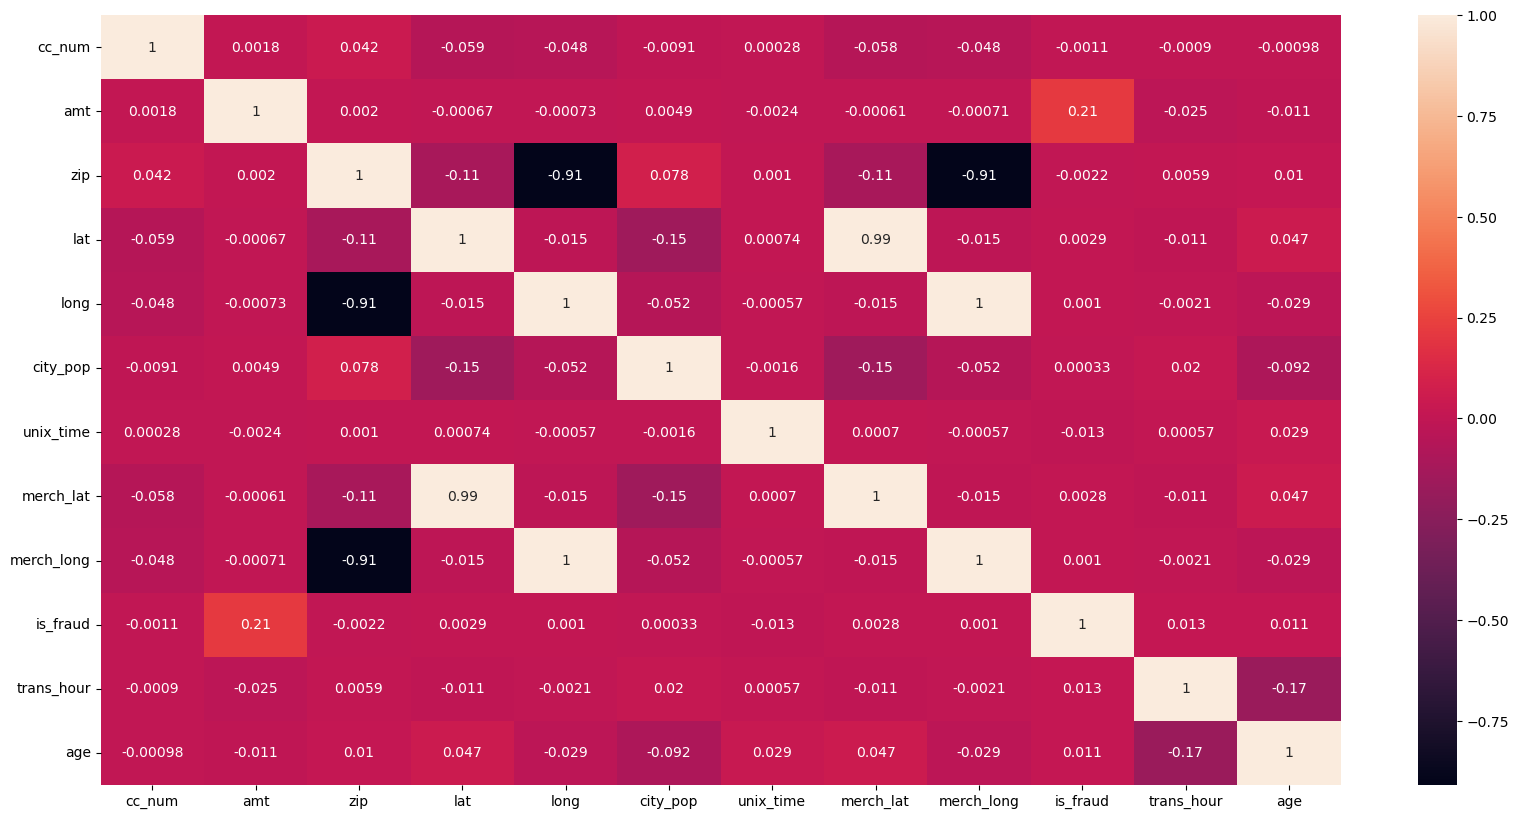

In [15]:
#heatmap1
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

Questions
Who was scammed with the most amount and what is gender?
How much amount that has been scammed the most?
What is gender that has been scammed the most?
What type of category that has been scammed the most?

(Answers
Who was scammed with the most amount and what is gender?: Meagan Edwards, Female
How much amount that has been scammed the most?: $1376.04
Answers
What is gender that has been scammed the most?: Male
What type of category that has been scammed the most?: shopping_net)

<h2><b>EDA - Exploratory Data Analysis

Lets review the distribution of the category

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


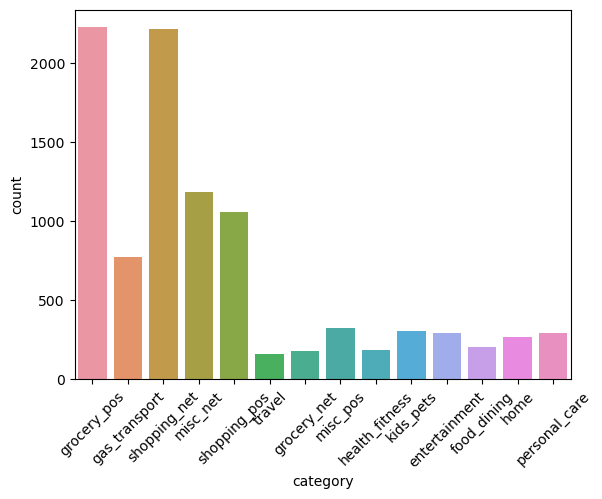

In [17]:
#looking at the distribution of category
sns.countplot(df[df['is_fraud']>0].category)
plt.xticks(rotation=45)
plt.show()

In [18]:
#constructing the category-transaction count distribution
df_category = df[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns = ['category', 'category_count']

#creating the zip-fraud distribution
df_fraud_category = df[['category', 'trans_num', 'is_fraud']].groupby(['category','is_fraud']).count().reset_index()
df_fraud_category.columns = ['category', 'is_fraud', 'Transaction count']

df_fraud_category = df_fraud_category.merge(df_category[['category', 'category_count']], how='inner', on='category')

df_fraud_category['Transaction percentage'] = (df_fraud_category['Transaction count']/df_fraud_category['category_count'])*100

#viewing the top categories with high fraudulent transaction volumes
df_fraud_category[df_fraud_category['is_fraud'] == 1].sort_values(by = ['Transaction percentage'], ascending=False)


category  is_fraud  Transaction count  category_count  \
23    shopping_net         1               2219          139322   
17        misc_net         1               1182           90654   
9      grocery_pos         1               2228          176191   
25    shopping_pos         1               1056          166463   
5    gas_transport         1                772          188029   
19        misc_pos         1                322          114229   
7      grocery_net         1                175           64878   
27          travel         1                156           57956   
21   personal_care         1                290          130085   
1    entertainment         1                292          134118   
15       kids_pets         1                304          161727   
3      food_dining         1                205          130729   
13            home         1                265          175460   
11  health_fitness         1                185          122553   

    Transaction percentage  
23                1.592713  
17                1.303859  
9                 1.264537  
25                0.634375  
5                 0.410575  
19                0.281890  
7                 0.269737  
27                0.269170  
21                0.222931  
1                 0.217719  
15                0.187971  
3                 0.156813  
13                0.151032  
11                0.150955

In [19]:
#categories with more than one percent fraudulent transactions
df_fraud_category.loc[(df_fraud_category.is_fraud == 1) & (df_fraud_category['Transaction percentage'] >= 1)].category

9      grocery_pos
17        misc_net
23    shopping_net
Name: category, dtype: object

What we see from the distribution of <b>category</b>,
Most frauds occured in categories of shopping_net and grocery_pos



Lets take a look at the distribution of the amount

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


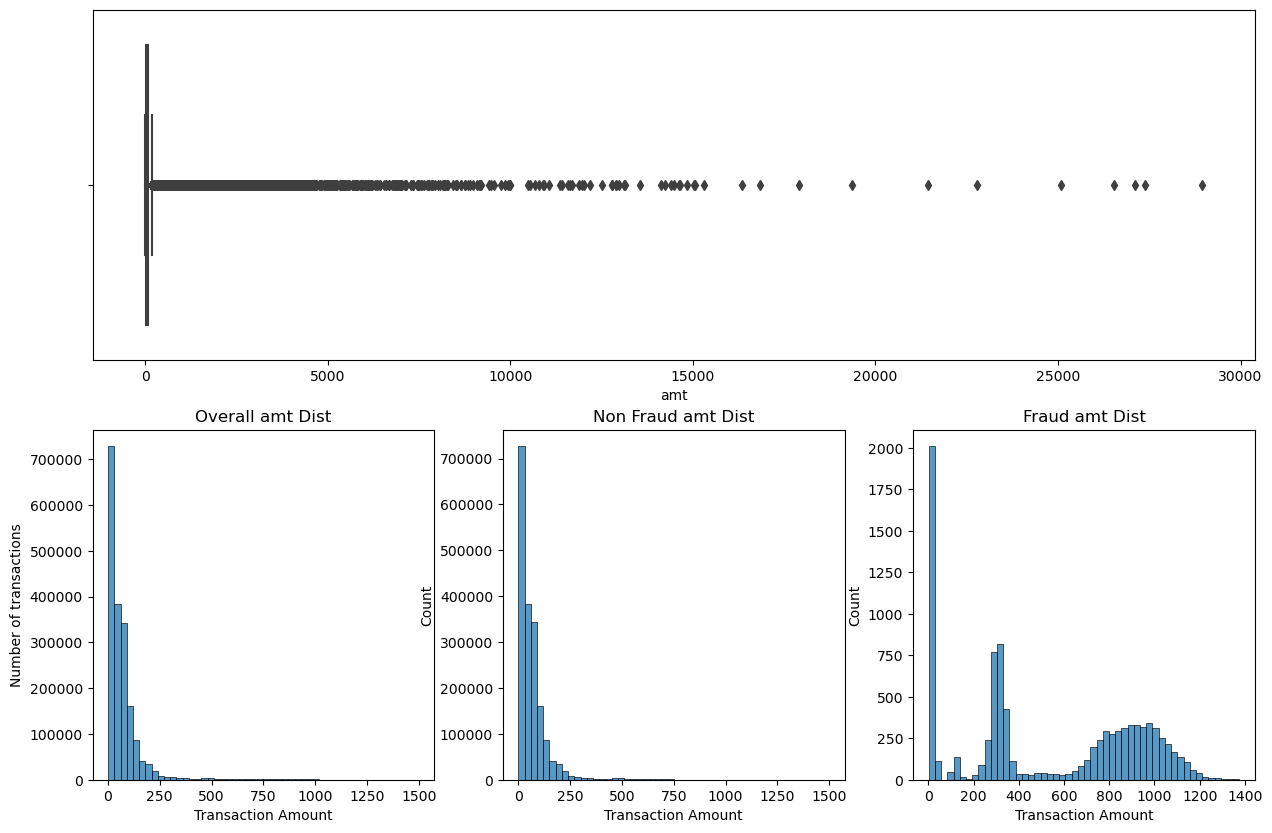

In [20]:
#plotting the above distributions
fig = plt.subplots(figsize=(15,10))

plots = []
#plotting the amt feature
#box plot
plots.append(sns.boxplot(df.amt, ax=plt.subplot(211)))

#distribution plots
plots.append(sns.histplot(df[df.amt <= 1500].amt, bins=50, ax=plt.subplot(234)))
plots.append(sns.histplot(df[(df.is_fraud==0) & (df.amt<=1500)].amt, bins=50, ax=plt.subplot(235)))
plots.append(sns.histplot(df[(df.is_fraud==1) & (df.amt<=1500)].amt, bins=50, ax=plt.subplot(236)))

#setting titles
plots[1].set_title('Overall amt Dist')
plots[2].set_title('Non Fraud amt Dist')
plots[3].set_title('Fraud amt Dist')

#setting x labels
plots[1].set_xlabel('Transaction Amount')
plots[2].set_xlabel('Transaction Amount')
plots[3].set_xlabel('Transaction Amount')

#setting y label
plots[1].set_ylabel('Number of transactions')

plt.show()

What we see from the distribution of <b>amount</b>,
normal transactions tend to be around 200USD or less, we see fraud transactions peak around 300USD and then at the 800-1000 range. clearly, most high amount transactions are fraud

Lets review the distribution of Gender

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


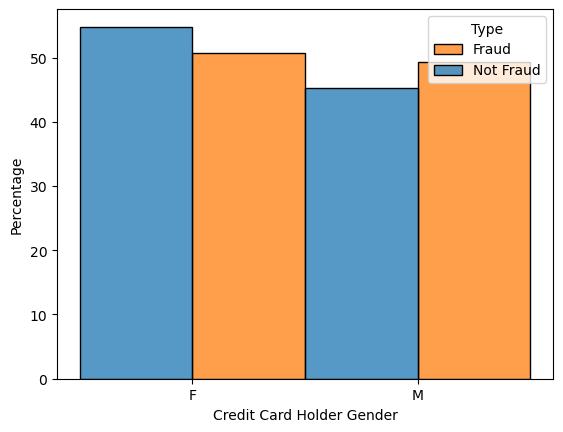

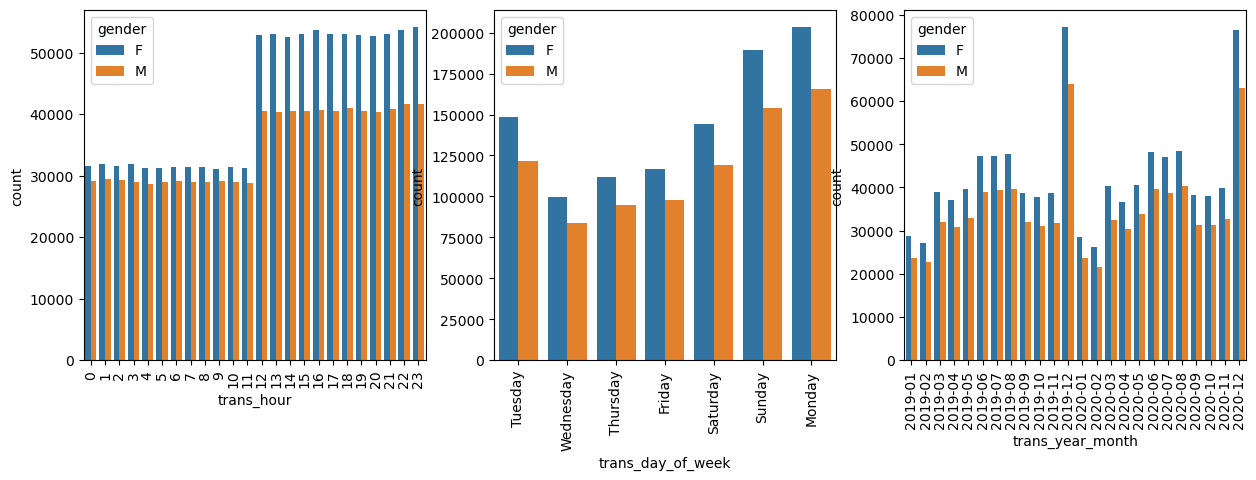

In [21]:
#Gender vs Fraud
ax=sns.histplot(x='gender',data=df, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

fig, ax = plt.subplots(figsize=(15,10))

plot = [0,0,0]
#plotting gender demographic with respect to transactions
#plotting transactions over time, with respect to gender
plot[0] = sns.countplot(df.trans_hour, hue=df.gender, ax=plt.subplot(234))
plot[1] = sns.countplot(df.trans_day_of_week, hue=df.gender, ax=plt.subplot(235))
plot[2] = sns.countplot(df.trans_year_month, hue=df.gender, ax=plt.subplot(236))

for i in plot:
    i.set_xticklabels(i.get_xticklabels(), rotation=90)
plt.show()

What we see from the distribution of <b>gender</b>,
Although more cases of fraud happened with female customers, the number is almost the same for both Males and Females

Lets review the distribution of time

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


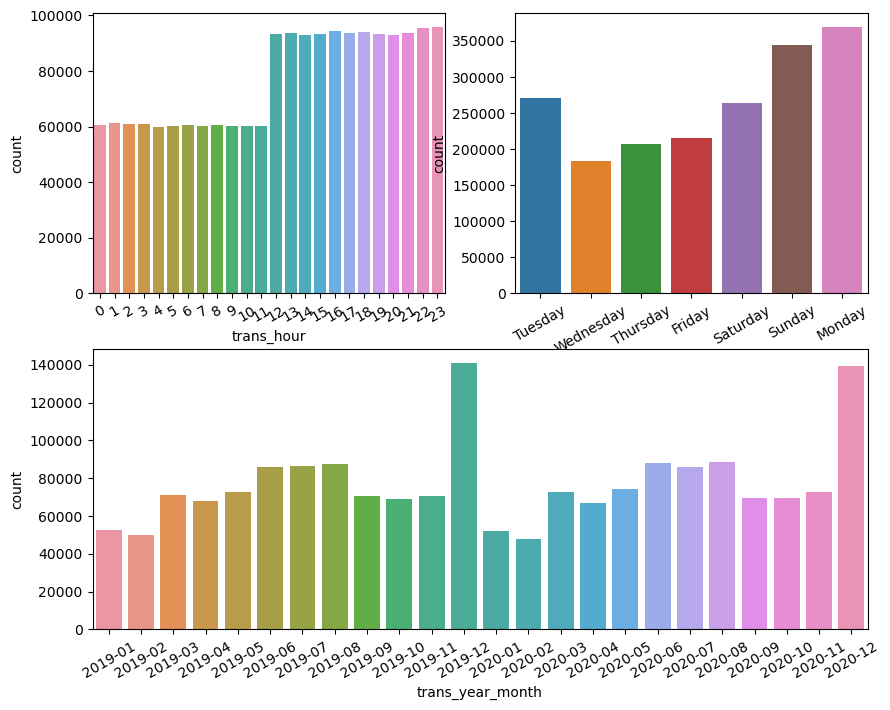

In [22]:
fix, ax = plt.subplots(figsize=(10,8))

plot = [0,0,0]
#plotting the 'trans_hour' feature
plot[0] = sns.countplot(df.trans_hour, ax = plt.subplot(221))
#plotting the 'trans_day_of_week' feature
plot[1] = sns.countplot(df.trans_day_of_week, ax = plt.subplot(222))
#plotting the 'trans_year_month' feature
plot[2] = sns.countplot(df.trans_year_month, ax = plt.subplot(212))

for i in plot:
    i.set_xticklabels(i.get_xticklabels(), rotation=30)
plt.show()

What we see from the distribution of <b>time</b>,
is that most transactions happened in the afternoon times of the day, and most transactions have happened at the begining of the week, during Sunday and Monday.

In [23]:
#lets view these plots with respect to the amount distributions.
#year and month vs number of transactions
df_time = df.groupby(df['trans_year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_time.columns = ['year_month','num_of_transactions','customers']
df_time

year_month  num_of_transactions  customers
0     2019-01                52525        913
1     2019-02                49866        918
2     2019-03                70939        916
3     2019-04                68078        913
4     2019-05                72532        910
5     2019-06                86064        908
6     2019-07                86596        910
7     2019-08                87359        911
8     2019-09                70652        913
9     2019-10                68758        912
10    2019-11                70421        911
11    2019-12               141060        916
12    2020-01                52202        911
13    2020-02                47791        909
14    2020-03                72850        912
15    2020-04                66892        914
16    2020-05                74343        915
17    2020-06                87805        911
18    2020-07                85848        911
19    2020-08                88759        908
20    2020-09                69533        914
21    2020-10                69348        913
22    2020-11                72635        909
23    2020-12               139538        910

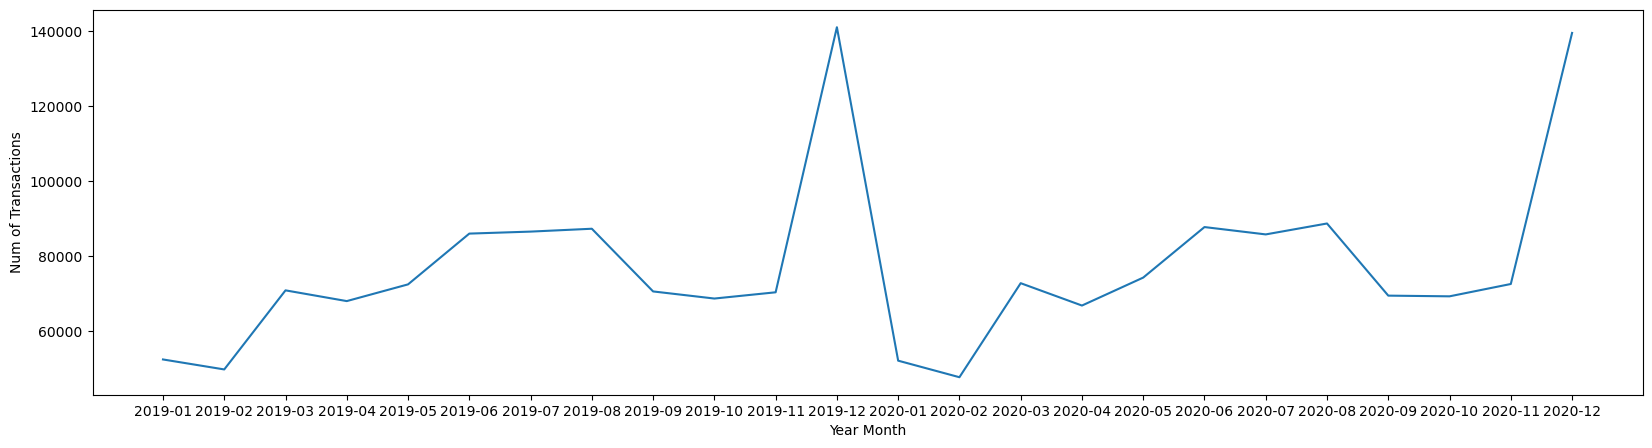

In [24]:
#view these plots with respect to the amount distributions.
x = np.arange(0,len(df_time),1)
fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_time['num_of_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_time['year_month'])
ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Transactions')
plt.show()

In [25]:
#year_month vs fraud trasactions and fraud customers.
df_fraud_transactions = df[df['is_fraud']>0]

df_time = df_fraud_transactions.groupby(df_fraud_transactions['trans_year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_time.columns = ['year_month','num_of_fraud_transactions','fraud_customers']
df_time

year_month  num_of_fraud_transactions  fraud_customers
0     2019-01                        506               50
1     2019-02                        517               53
2     2019-03                        494               49
3     2019-04                        376               41
4     2019-05                        408               42
5     2019-06                        354               35
6     2019-07                        331               36
7     2019-08                        382               39
8     2019-09                        418               44
9     2019-10                        454               50
10    2019-11                        388               41
11    2019-12                        592               62
12    2020-01                        343               40
13    2020-02                        336               35
14    2020-03                        444               45
15    2020-04                        302               36
16    2020-05                        527               54
17    2020-06                        467               47
18    2020-07                        321               35
19    2020-08                        415               41
20    2020-09                        340               35
21    2020-10                        384               39
22    2020-11                        294               31
23    2020-12                        258               26

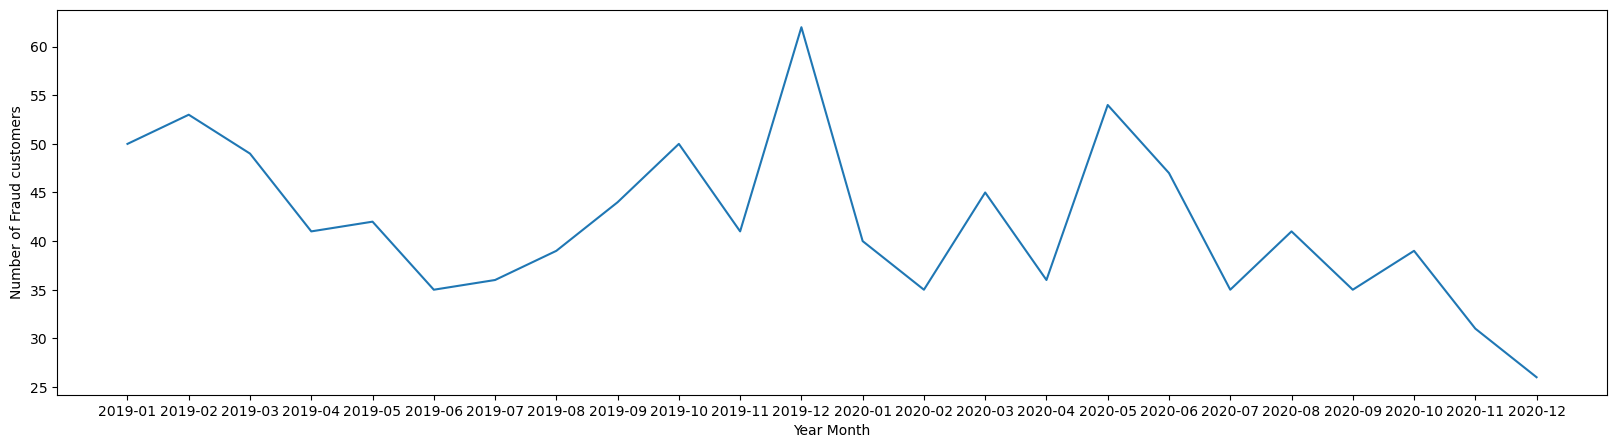

In [26]:
x = np.arange(0,len(df_time),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_time['fraud_customers'])
ax.set_xticks(x)
ax.set_xticklabels(df_time['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Number of Fraud customers')
plt.show()

according to the 'trans_year_month' data, it can be noted that the number of fraud customers and the number of fraud transaction have increased in the time of December, which makes sence since it is the holiday season.<br>
It can be observed that since most of the transaction happen after the noon hour of the day, the surveilance can be increased upon the transactions after 12pm in the day in order to reduce fraudulent transactions.
In the holiday seasons like the 12th month of december, the number of transactions increase, such times can be monitored closely in order to reduce fraudulent transactions.
Also, in the holiday season most people tend to go for shopping and other recreational and cultural activities during which people might be using their credit cards for various purposes. And hence, merchants in such a domain can be checked and educated about the fradulent practices happening.


Lets review the distribution of age

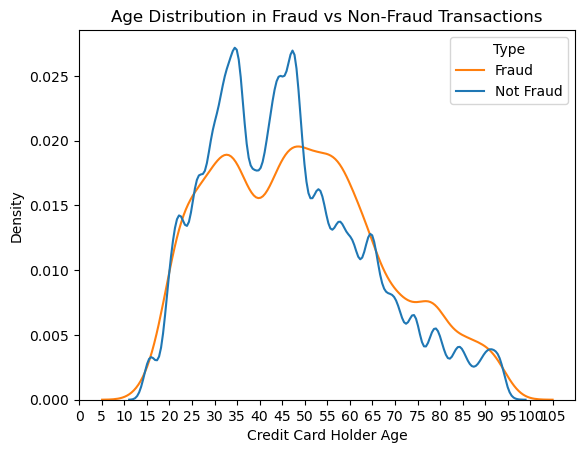

In [27]:
#age vs fraud
ax=sns.kdeplot(x='age',data=df, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraud vs Non-Fraud Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In [28]:
#let us first bin the age feature
for i in range(len(df.age)):
    if df.age[i] <= 30:
        df.age[i] = '< 30'
    elif df.age[i] > 30 and df.age[i] <= 45:
        df.age[i] = '30-45'
    elif df.age[i] > 45 and df.age[i] <= 60:
        df.age[i] = '46-60'
    elif df.age[i] > 60 and df.age[i] <= 75:
        df.age[i] = '61-75'
    else:
        df.age[i] = '> 75'

df.age.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14360\3078514042.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.age[i] = '30-45'


0    30-45
1    30-45
2    46-60
3    46-60
4    30-45
Name: age, dtype: object

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


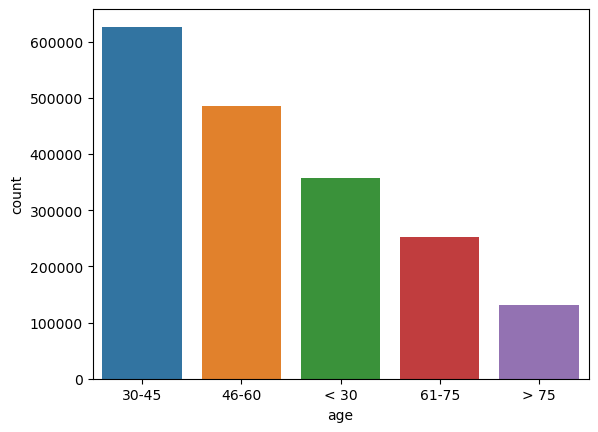

In [29]:
#plotting the age feature in the data
plot = sns.countplot(df.age)
plt.show()

In [30]:
#Now, let us view the 'age' feature with respect to the 'is_fraud' variable.

#constructing the age-transaction count distribution
df_age = df[['age','trans_num']].groupby(['age']).count().reset_index()
df_age.columns = ['age', 'age_count']

#creating the age-fraud distribution
df_fraud_age = df[['age', 'trans_num', 'is_fraud']].groupby(['age','is_fraud']).count().reset_index()
df_fraud_age.columns = ['age', 'is_fraud', 'Transaction count']

df_fraud_age = df_fraud_age.merge(df_age[['age', 'age_count']], how='inner', on='age')

df_fraud_age['Transaction percentage'] = (df_fraud_age['Transaction count']/df_fraud_age['age_count'])*100

df_fraud_age

age  is_fraud  Transaction count  age_count  Transaction percentage
0  30-45         0             624194     626681               99.603147
1  30-45         1               2487     626681                0.396853
2  46-60         0             481947     484709               99.430174
3  46-60         1               2762     484709                0.569826
4  61-75         0             250757     252266               99.401822
5  61-75         1               1509     252266                0.598178
6   < 30         0             355435     357316               99.473575
7   < 30         1               1881     357316                0.526425
8   > 75         0             130410     131422               99.229961
9   > 75         1               1012     131422                0.770039

Observation (Age groups):
from the above plots it can be observed that the most number of transactions in the datset have been done by the people in the 30-45 age group.
Also, the 46-60 age group has done significant number of transactions.
With respect to the total number of transaction made by a particular age group the people in the >75 age group are the most affected, wherein, the highest percentage, about 0.77% transaction made by these people have been fraudulent.
Inference:
These are the people that are much prone to frauds and hence their transactions can be monitored with much more vigilance and they need to be educated regarding the frauds happening in order to reduce fraudulent transactions.
The old age people might be targeted by fraudsters to take advantage of their lack of knowledge towards fina

Lets review the distribution of state

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


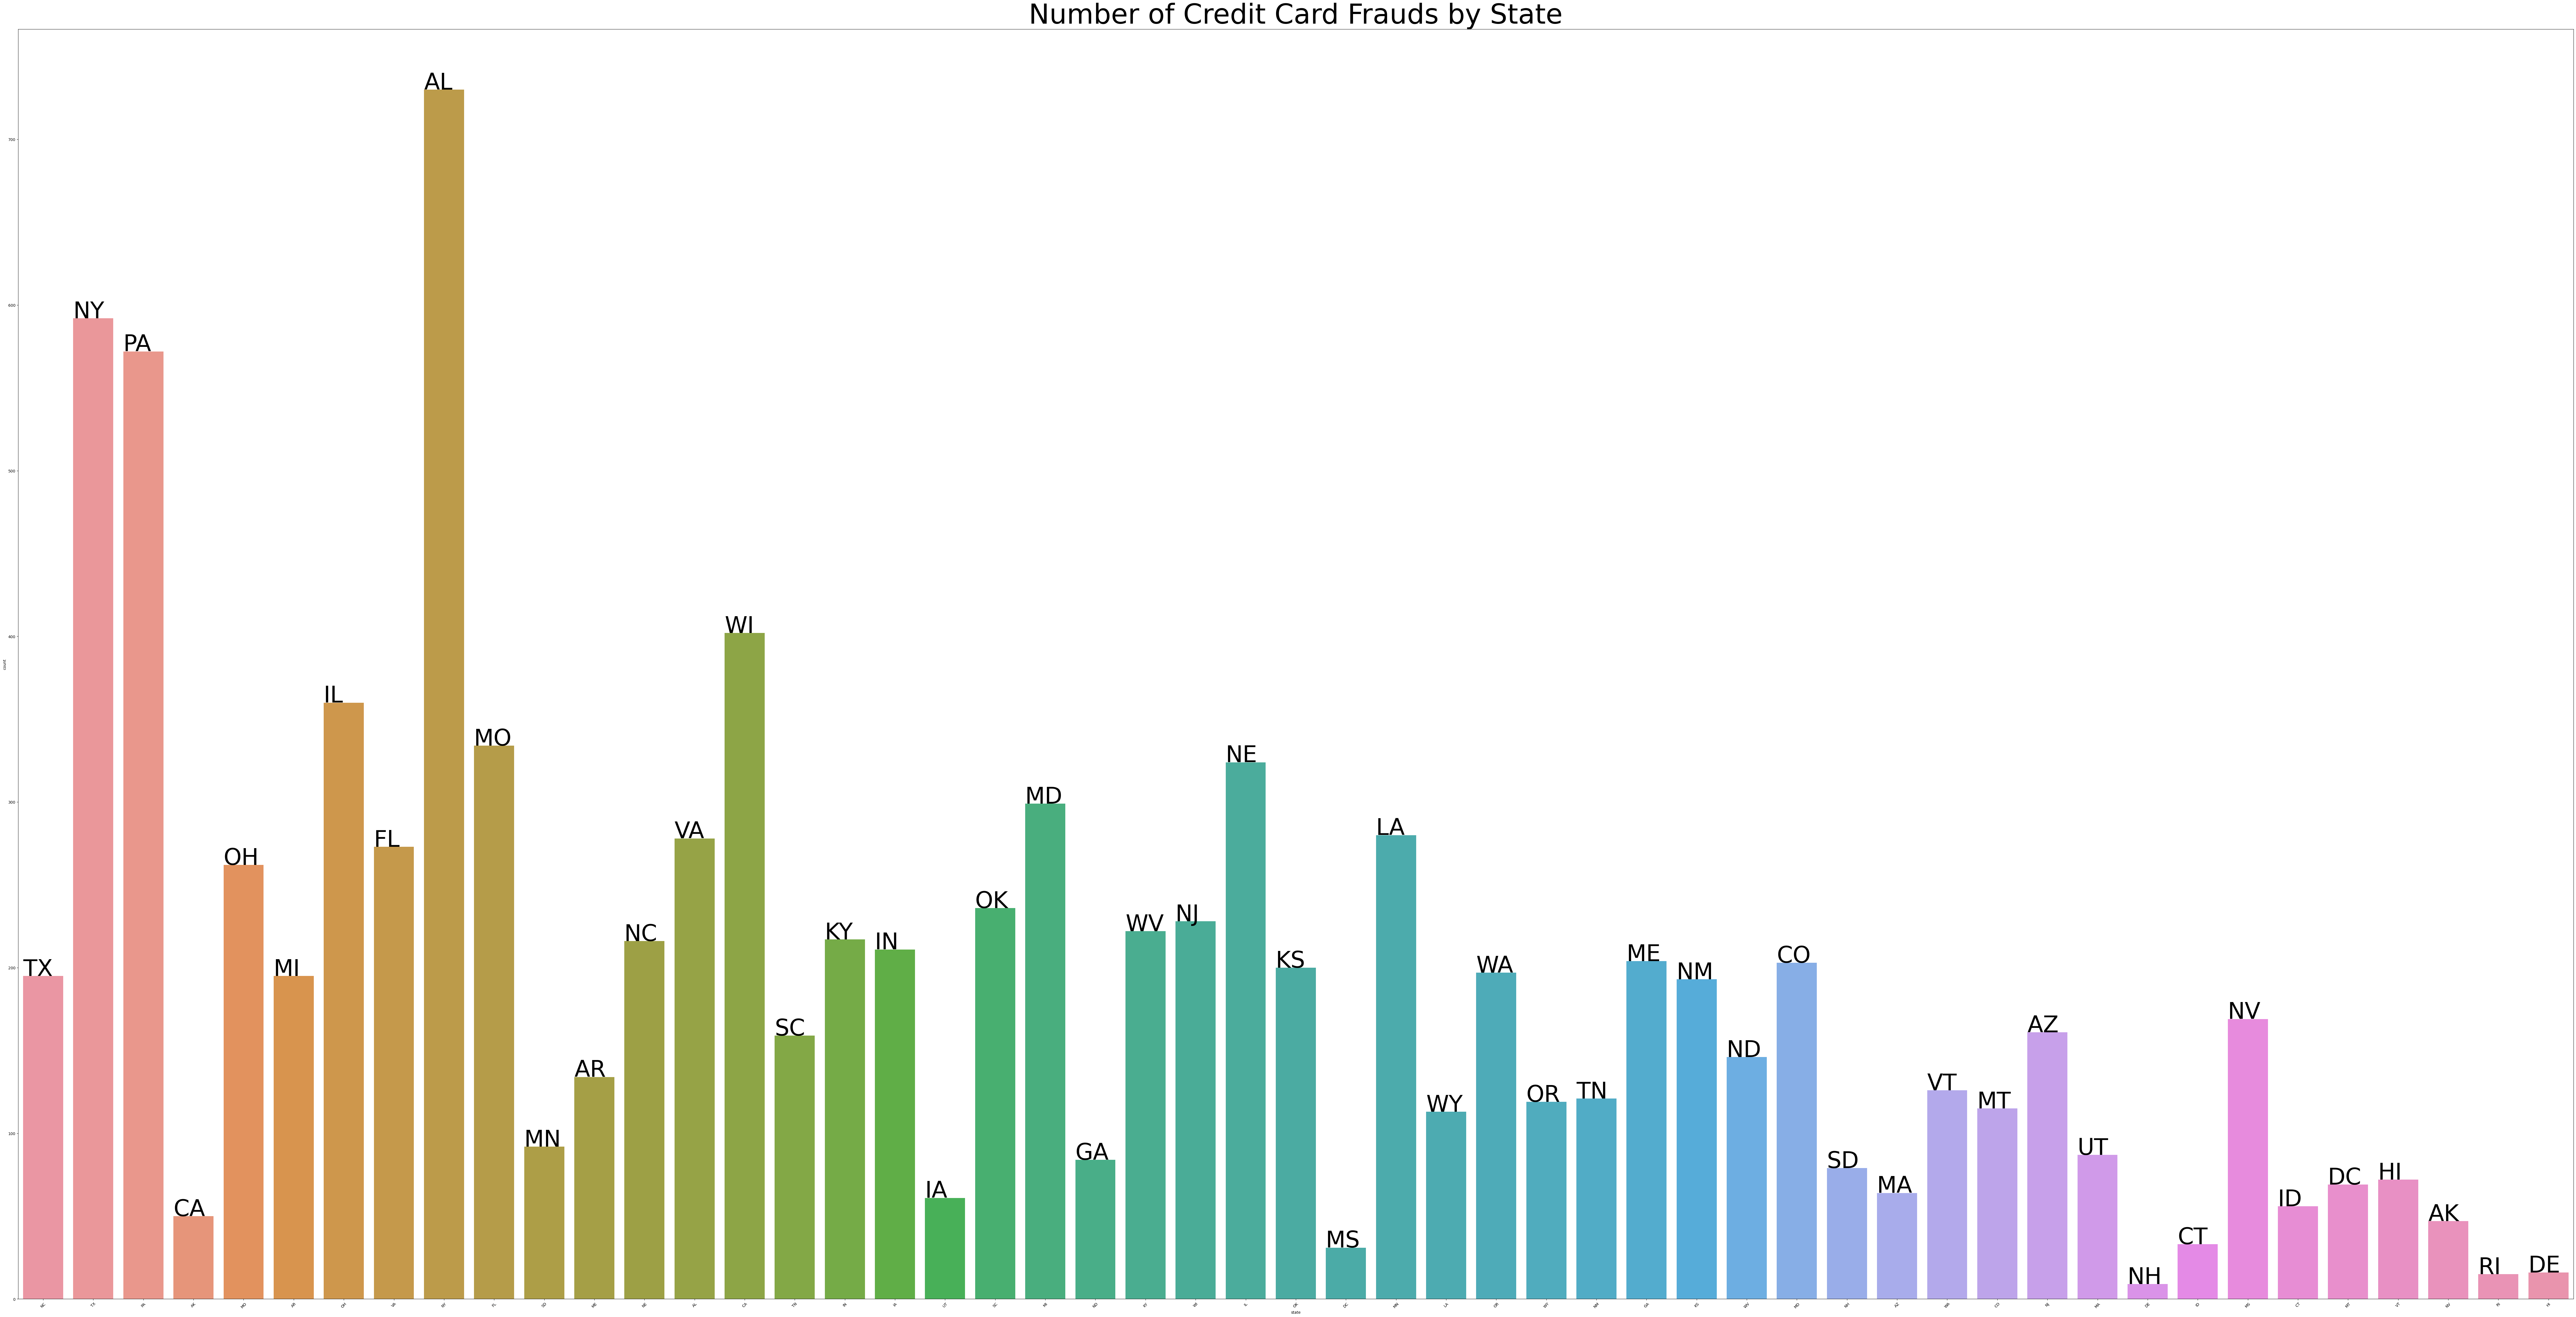

In [31]:
fig, ax = plt.subplots(figsize=(120,60))
plt.rcParams.update({'font.size': 60})
sns.countplot(df[df['is_fraud']>0].state)
plt.xticks(rotation=45)
for p, label in zip(ax.patches, df["state"].value_counts().index):
    ax.annotate(label, (p.get_x(), p.get_height()+0.15))
plt.title("Number of Credit Card Frauds by State")
plt.show()

In [32]:
#constructing the state-transaction count distribution
df_state = df[['state','trans_num']].groupby(['state']).count().reset_index()
df_state.columns = ['state', 'state_count']

#creating the state-fraud distribution
df_fraud_state = df[['state', 'trans_num', 'is_fraud']].groupby(['state','is_fraud']).count().reset_index()
df_fraud_state.columns = ['state', 'is_fraud', 'Transaction count']

df_fraud_state = df_fraud_state.merge(df_state[['state', 'state_count']], how='inner', on='state')

df_fraud_state['Transaction percentage'] = (df_fraud_state['Transaction count']/df_fraud_state['state_count'])*100

#viewing the top 20 states with high fraudulent transactions
df_fraud_state[df_fraud_state['is_fraud'] == 1].sort_values(by = ['Transaction percentage'], ascending=False).head(20)

state  is_fraud  Transaction count  state_count  Transaction percentage
16    DE         1                  9            9              100.000000
78    RI         1                 15          745                2.013423
1     AK         1                 50         2963                1.687479
74    OR         1                197        26408                0.745986
60    NH         1                 79        11727                0.673659
90    VA         1                273        41756                0.653798
84    TN         1                159        24913                0.638221
58    NE         1                216        34425                0.627451
46    MN         1                280        45433                0.616292
68    NY         1                730       119419                0.611293
15    DC         1                 31         5130                0.604288
32    KS         1                193        32939                0.585932
66    NV         1                 47         8058                0.583271
11    CO         1                115        19766                0.581807
42    ME         1                134        23433                0.571843
80    SC         1                236        41731                0.565527
50    MS         1                169        30021                0.562939
18    FL         1                334        60775                0.549568
30    IN         1                217        39539                0.548825
20    GA         1                204        37340                0.546331

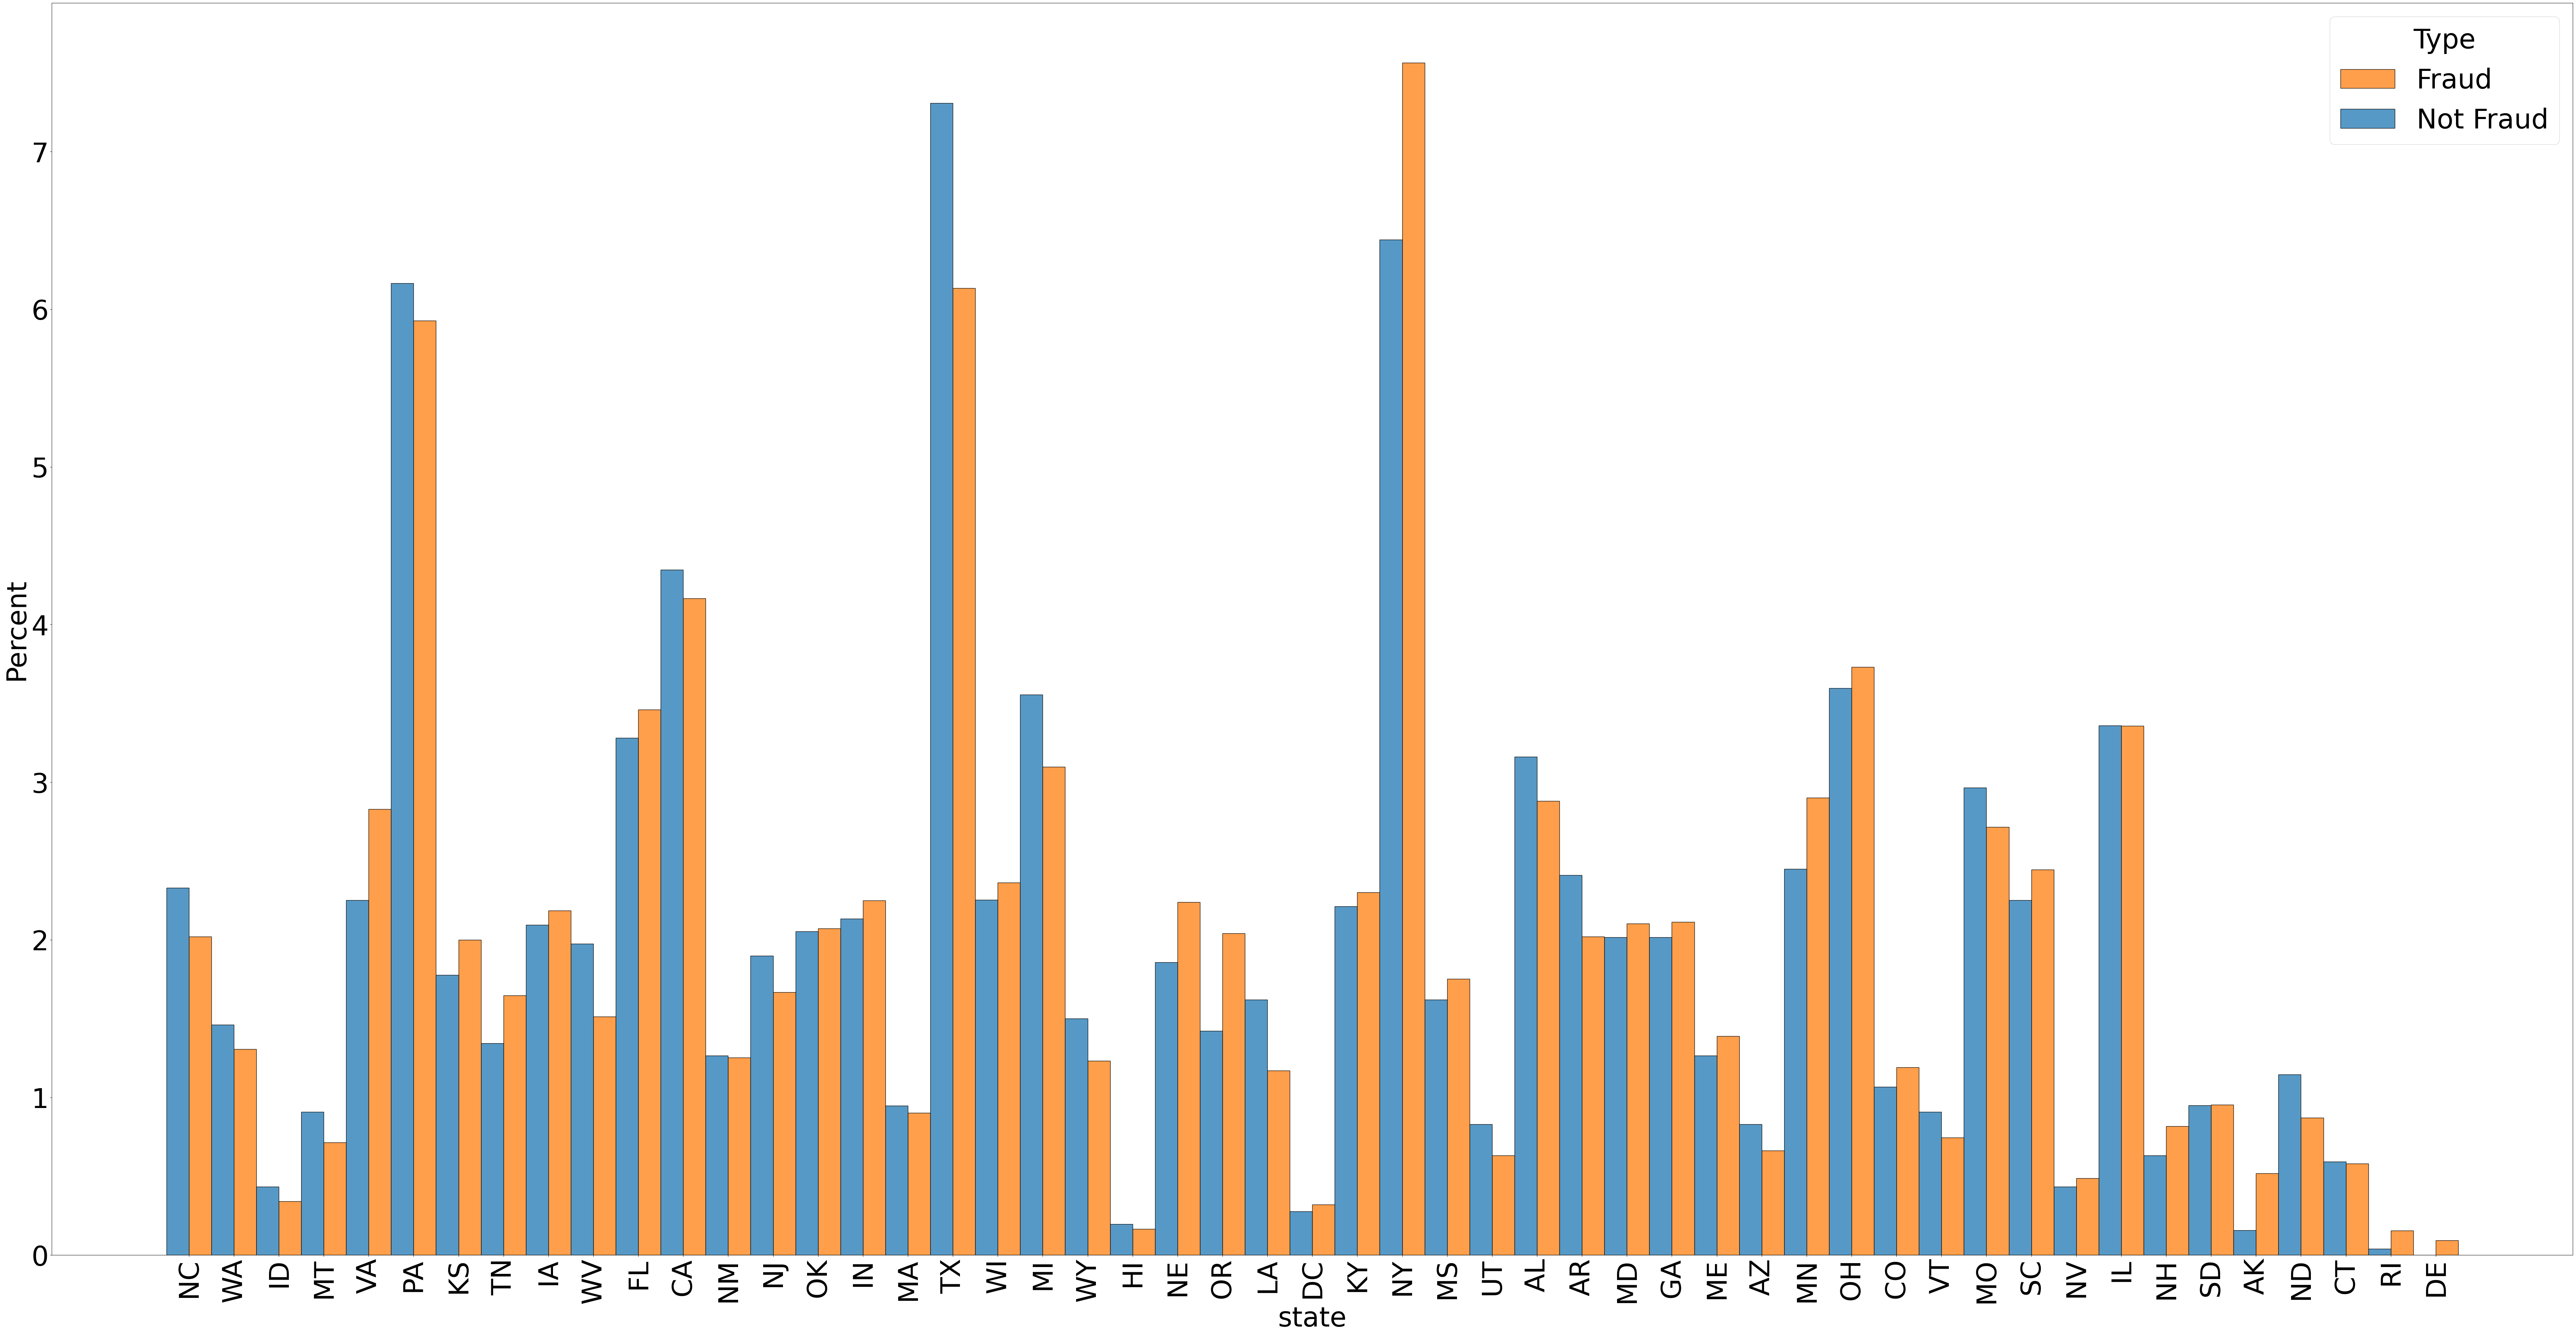

In [33]:
# State vs fraud
f, ax = plt.subplots(figsize=(100, 50))
ax=sns.histplot(x='state',data=df, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
plt.xticks(rotation=90)
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.show();

The states 'PA', 'TX', 'NY' have the most amount of transactions noted in the given dataset.
The next highest in the list are 'FL', 'CA', 'MI', 'AL', 'OH' and 'IL'.
Majority of the transactions are happening in these states, and hence there is a high chance of fraudulent transaction happening in these states thourgh various methods including ATM and POS machine tamperings.
In the top 20 states with high transaction volumes, it can be noted that all states have a fraudulent transaction of about 0.5%.
'DE' is the most fraudulent state.<br>
In view of the above observations, it can be concluded that in order to reduce the number of fraudulent transactions overall, it is necessary that the monitoring of transactions in areas where in the most number of transaction must be increased.
Therefore, the people in these areas could be alerted about the fradulent practices and can be adviced to follow the best practices to reduce the number of credit card frauds.

Finding distance from customer location to merchant location in degrees latitude and degrees longitude



In [34]:
df['latitudinal_distance'] = abs(round(df['merch_lat']-df['lat'],3))
df['longitudinal_distance'] = abs(round(df['merch_long']-df['long'],3))

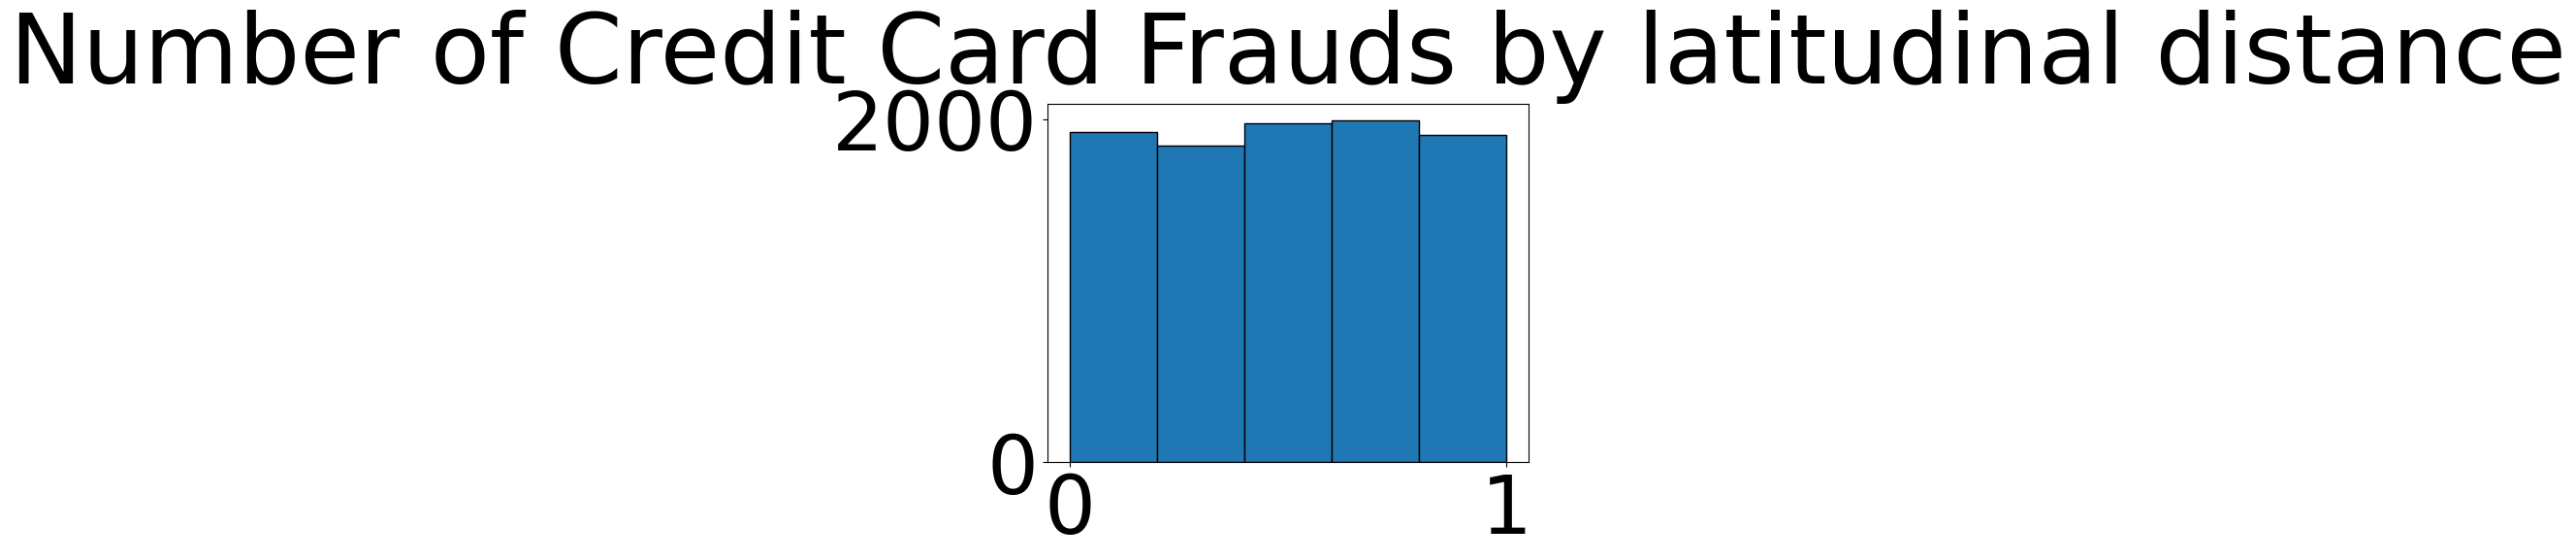

In [36]:
fraud = df[df["is_fraud"]>0]
fig, ax = plt.subplots()
ax.hist(fraud.latitudinal_distance, edgecolor = "black", bins = 5)
plt.title("Number of Credit Card Frauds by latitudinal distance")
plt.show()

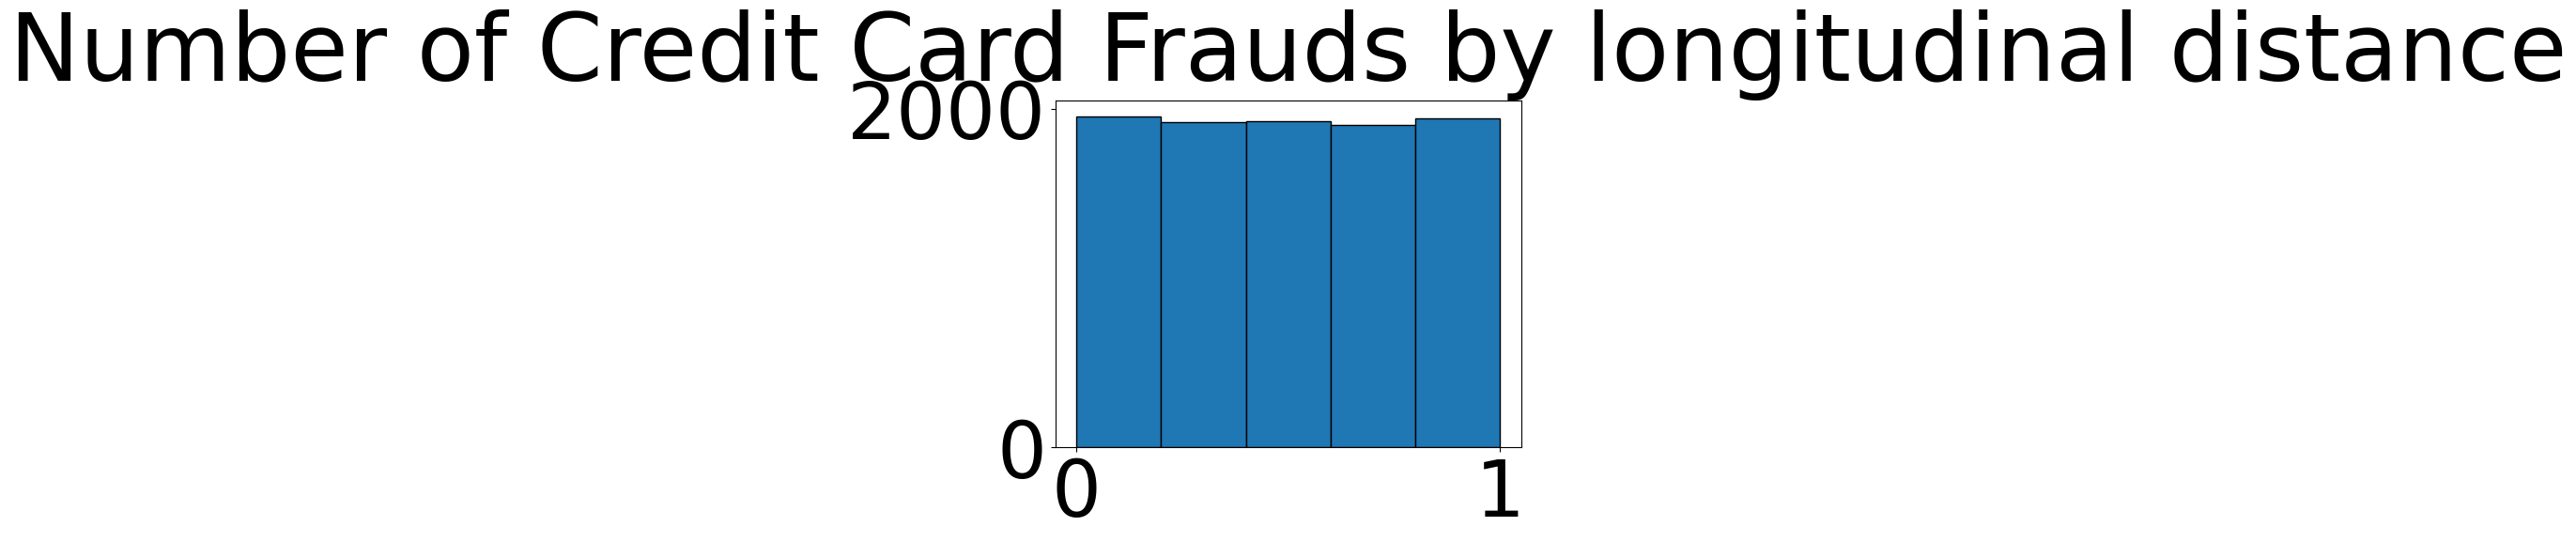

In [37]:
fig, ax = plt.subplots()
ax.hist(fraud.longitudinal_distance, edgecolor = "black", bins = 5)
plt.title("Number of Credit Card Frauds by longitudinal distance")
plt.show()

City

In [38]:
print('number of cities: ',df.city.nunique())

number of cities:  906


It can be observed that it is difficult to plot a feature with such high number of unique values.
Now, there is very high of chance of frauds happening in the cities or zip codes where there are very high transaction frequencies.
Since it is difficult to visualize all the categories of cities at the same time we will now visualize the top 20 cities and top 20 zip codes with high transaction frequencies.

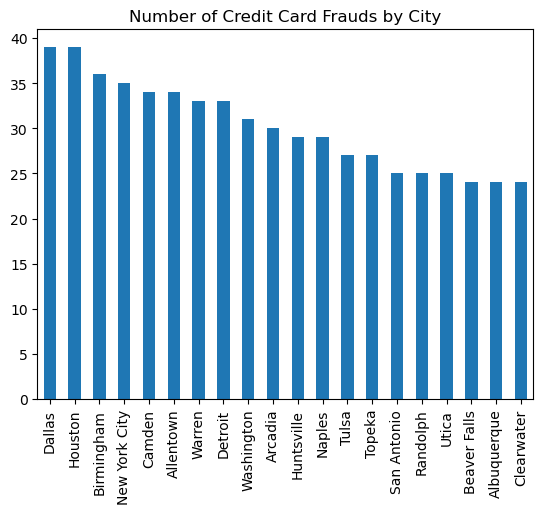

In [39]:
import random
def randomcolor():
    r = random.random()
    b = random.random()
    g = random.random()
    rgb = [r,g,b]
    return rgb
plt.rcParams.update({'font.size': 10})
df[df['is_fraud']>0]["city"].value_counts(sort=True,ascending=False).head(20).plot(kind="bar")
plt.title("Number of Credit Card Frauds by City")
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


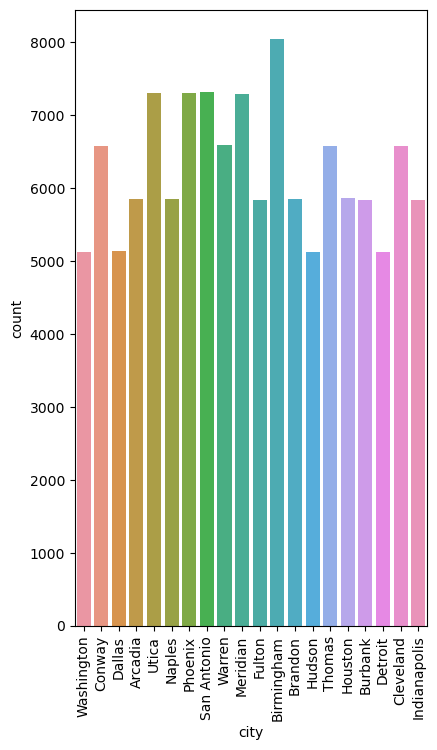

In [40]:
fig, ax = plt.subplots(figsize=(10,8))
#plotting the cities transaction frequencies again
plots = []
high_trans_cities = df.city.value_counts().head(20).index.tolist()

plots.append(sns.countplot(df[df.city.isin(high_trans_cities)].city, ax=plt.subplot(121)))

for i in plots:
    i.set_xticklabels(i.get_xticklabels(), rotation=90)
plt.show()

Now, let us view the fraudulent transaction frequencies in each city through a dataframe.


In [41]:
#constructing the city-transaction count distribution
df_city = df[['city','trans_num']].groupby(['city']).count().reset_index()
df_city.columns = ['city', 'city_count']

#creating the city-fraud distribution
df_fraud_city = df[['city', 'trans_num', 'is_fraud']].groupby(['city','is_fraud']).count().reset_index()
df_fraud_city.columns = ['city', 'is_fraud', 'Transaction count']

df_fraud_city = df_fraud_city.merge(df_city[['city', 'city_count']], how='inner', on='city')

df_fraud_city['Transaction percentage'] = (df_fraud_city['Transaction count']/df_fraud_city['city_count'])*100

#viewing the top 20 cities with high fraudulent transaction volumes
df_fraud_city[df_fraud_city['is_fraud'] == 1].sort_values(by = ['Transaction percentage'], ascending=False).head(20)

city  is_fraud  Transaction count  city_count  \
1322           Rice         1                  8           8   
1106        Norfolk         1                  7           7   
1325   Ridge Spring         1                 10          10   
445      East China         1                  9           9   
1294     Queen Anne         1                 13          13   
1627         Waukau         1                 10          10   
1247  Pleasant Hill         1                  8           8   
528        Freeport         1                  9           9   
1231         Phelps         1                 11          11   
109          Beacon         1                 11          11   
535          Gaines         1                  8           8   
564        Granbury         1                 12          12   
587       Greenport         1                 10          10   
600         Grenola         1                  9           9   
193      Brookfield         1                  9           9   
608         Guthrie         1                  9           9   
1173    Orange Park         1                 10          10   
1152         Oakton         1                  9           9   
1115     North East         1                  9           9   
418          Downey         1                 10          10   

      Transaction percentage  
1322                   100.0  
1106                   100.0  
1325                   100.0  
445                    100.0  
1294                   100.0  
1627                   100.0  
1247                   100.0  
528                    100.0  
1231                   100.0  
109                    100.0  
535                    100.0  
564                    100.0  
587                    100.0  
600                    100.0  
193                    100.0  
608                    100.0  
1173                   100.0  
1152                   100.0  
1115                   100.0  
418                    100.0

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


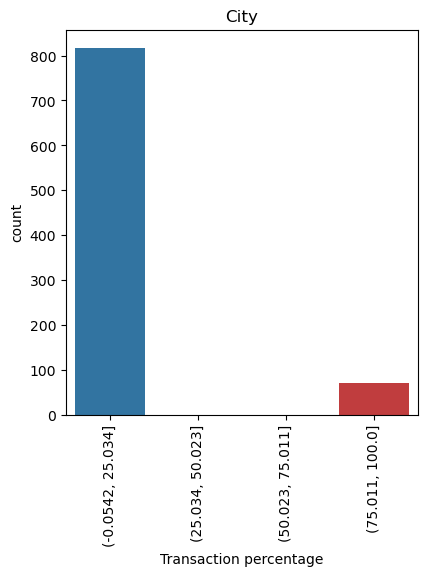

In [42]:
fig, ax = plt.subplots(figsize=(10,5))

plots = []
#plotting the fraudulent transactions percentage by binning

plots.append(sns.countplot(pd.cut(df_fraud_city[df_fraud_city.is_fraud > 0]['Transaction percentage'], bins = 4), ax=plt.subplot(122)))

plots[0].set_title('City')

for plot in plots:
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plt.show()

In [43]:
#cities with more fraudulent transactions
print('Cities with more than 75% fraudulent transactions:\n')
print(df_fraud_city.loc[(df_fraud_city.is_fraud == 1) & (df_fraud_city['Transaction percentage'] >= 75)].city.tolist())


Cities with more than 75% fraudulent transactions:

['Angwin', 'Ashland', 'Beacon', 'Brookfield', 'Bruce', 'Buellton', 'Byesville', 'Chattanooga', 'Clarion', 'Claypool', 'Clinton', 'Coulee Dam', 'Craig', 'Crouse', 'Downey', 'East China', 'Freeport', 'Gaines', 'Granbury', 'Greenport', 'Grenola', 'Grifton', 'Guthrie', 'Hubbell', 'Irvington', 'Isanti', 'Kaktovik', 'Karns City', 'Kirkwood', 'Kirtland', 'La Grande', 'Las Vegas', 'Lexington', 'Lockhart', 'Madisonville', 'Marshall', 'Medford', 'Melville', 'Mineral', 'Morrowville', 'Morven', 'Moss Point', 'Mount Vernon', 'Mountain City', 'Nanuet', 'Nicholson', 'Noblesville', 'Norfolk', 'North East', 'Oakton', 'Orange Park', 'Phelps', 'Pleasant Hill', 'Queen Anne', 'Rice', 'Ridge Spring', 'Roland', 'Seattle', 'Seligman', 'Senatobia', 'Springville', 'Streator', 'Vacaville', 'Walkertown', 'Wappapello', 'Wartburg', 'Waukau', 'West Frankfort', 'Wever', 'Winnsboro']


Observation (city):
from the above plot the places with high transaction frequencies can be observed.
it is common knowledge that these cities are some of the busiest places in the world which justifies the transaction frequencies in these areas.
about 70 cities have more than 75% fradulent transactions.
Inference:
The people in these areas can be educated about the risks associated with using credit cards with respect to frauds.
the monitoring of transactions can be increased in order to decrease the number of fraudulent transacions.

Job

In [44]:
df.job.nunique()

497

Similar to the 'city', the 'job' feature too has a lot of unique values which make it difficult for us to visualize and analyse the feature.
Therefore, we will now only look at the top 20 jobs, people from which are transacting in high frequencies.

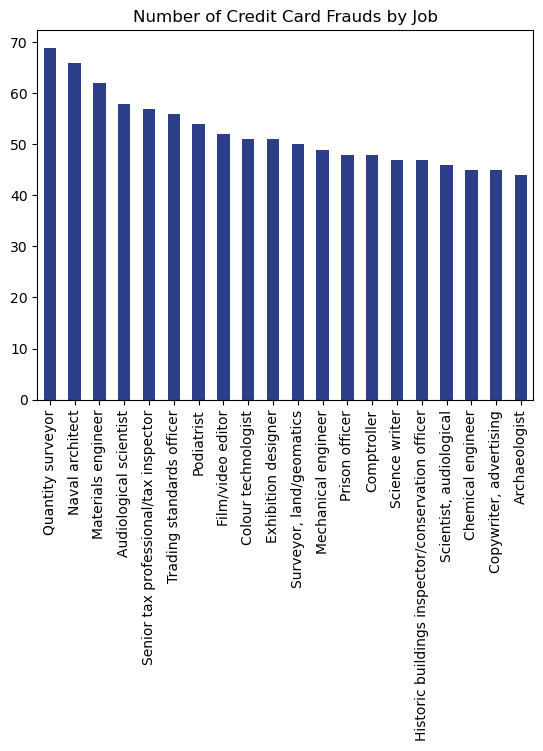

In [45]:
df[df['is_fraud']>0]["job"].value_counts(sort=True,ascending=False).head(20).plot(kind="bar",color=randomcolor())
plt.title("Number of Credit Card Frauds by Job")
plt.show()

Insight-
Most frauds occured in jobs of quantity surveyor followed by naval architect and materials engineer

In [46]:
#constructing the zip-transaction count distribution
df_job = df[['job','trans_num']].groupby(['job']).count().reset_index()
df_job.columns = ['job', 'job_count']

#creating the zip-fraud distribution
df_fraud_job = df[['job', 'trans_num', 'is_fraud']].groupby(['job','is_fraud']).count().reset_index()
df_fraud_job.columns = ['job', 'is_fraud', 'Transaction count']

df_fraud_job = df_fraud_job.merge(df_job[['job', 'job_count']], how='inner', on='job')

df_fraud_job['Transaction percentage'] = (df_fraud_job['Transaction count']/df_fraud_job['job_count'])*100

#viewing the top 20 jobs with high fraudulent transaction volumes
df_fraud_job[df_fraud_job['is_fraud'] == 1].sort_values(by = ['Transaction percentage'], ascending=False).head(20)


job  is_fraud  Transaction count  \
444                          Homeopath         1                 11   
2                Accountant, chartered         1                 11   
393            Forest/woodland manager         1                  9   
834                  Software engineer         1                 11   
827                        Ship broker         1                  7   
68      Armed forces technical officer         1                  8   
228                             Dancer         1                 19   
796  Sales promotion account executive         1                 14   
39              Air traffic controller         1                 17   
99                Broadcast journalist         1                  9   
207         Contracting civil engineer         1                  7   
475                   Industrial buyer         1                 10   
478                Information officer         1                  8   
340                    Engineer, water         1                  8   
335                     Engineer, site         1                 12   
118                    Careers adviser         1                 15   
651                  Personnel officer         1                 12   
947                 Veterinary surgeon         1                  8   
624      Operational investment banker         1                 11   
521                    Legal secretary         1                 12   

     job_count  Transaction percentage  
444         11                   100.0  
2           11                   100.0  
393          9                   100.0  
834         11                   100.0  
827          7                   100.0  
68           8                   100.0  
228         19                   100.0  
796         14                   100.0  
39          17                   100.0  
99           9                   100.0  
207          7                   100.0  
475         10                   100.0  
478          8                   100.0  
340          8                   100.0  
335         12                   100.0  
118         15                   100.0  
651         12                   100.0  
947          8                   100.0  
624         11                   100.0  
521         12                   100.0

In [47]:
#job with more than one percent fraudulent transactions
df_fraud_job.loc[(df_fraud_job.is_fraud == 1) & (df_fraud_job['Transaction percentage'] >= 50)].job

2                  Accountant, chartered
39                Air traffic controller
68        Armed forces technical officer
99                  Broadcast journalist
118                      Careers adviser
207           Contracting civil engineer
228                               Dancer
335                       Engineer, site
340                      Engineer, water
393              Forest/woodland manager
444                            Homeopath
475                     Industrial buyer
478                  Information officer
521                      Legal secretary
624        Operational investment banker
651                    Personnel officer
796    Sales promotion account executive
827                          Ship broker
834                    Software engineer
837                            Solicitor
947                   Veterinary surgeon
956                    Warehouse manager
Name: job, dtype: object

Observation ('job' feature):
The above are the jobs where in high transaction frequencies have been noted.
In the above dataframe, the transactions containing the job feature value as-Armed forces technical officer; Engineer, site; Information officer; Legal secretary; Industrial buyer; Careers adviser; Homeopath; Broadcast journalist; Personnel officer; Forest/woodland manager; Sales promotion account executive; Air traffic controller; Contracting civil engineer; Ship broker; Solicitor;2 Accountant, chartered; Dancer; Warehouse manager; Veterinary surgeon have completely fraudulent transactions.
Inference:
The people in the jobs with high number of fraudulent transactions can be alerted about the credit card transaction frauds so that they can be more carefull while using their credit cards.
the jobs roles in which almost all transactions are fraudulent might mean that there is some fault with the datapoint. That is, the person representing the specific job might be at fault since it is highly unlikely that all the transactions made by a person from a spceific job are fraudulent. Hence, doing some kind of background check upon the credit card user might help in this case.

<b><h2>Insights from EDA.....

<b>Clustering using K- means


1.Segmentation using amount and state


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 24 columns):
 #   Column                 Dtype    
---  ------                 -----    
 0   cc_num                 int64    
 1   merchant               object   
 2   category               object   
 3   amt                    float64  
 4   gender                 object   
 5   street                 object   
 6   city                   object   
 7   state                  object   
 8   zip                    int64    
 9   lat                    float64  
 10  long                   float64  
 11  city_pop               int64    
 12  job                    object   
 13  trans_num              object   
 14  unix_time              int64    
 15  merch_lat              float64  
 16  merch_long             float64  
 17  is_fraud               int64    
 18  trans_hour             int64    
 19  trans_day_of_week      object   
 20  trans_year_month       period[M]
 21  age     

In [155]:
'''trans_hour'''
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

temp = df.copy()
fraud_trans = temp[temp['is_fraud'] == 1][:200]
non_fraud_trans = temp[temp['is_fraud'] == 0][:200]
temp = pd.concat([fraud_trans, non_fraud_trans]).reset_index()
temp = shuffle(temp)

X1 = temp[['trans_hour' , 'is_fraud']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='full') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

Selecting N Clusters based in Inertia (Squared Distance between Centroids and data points, should be less)¶


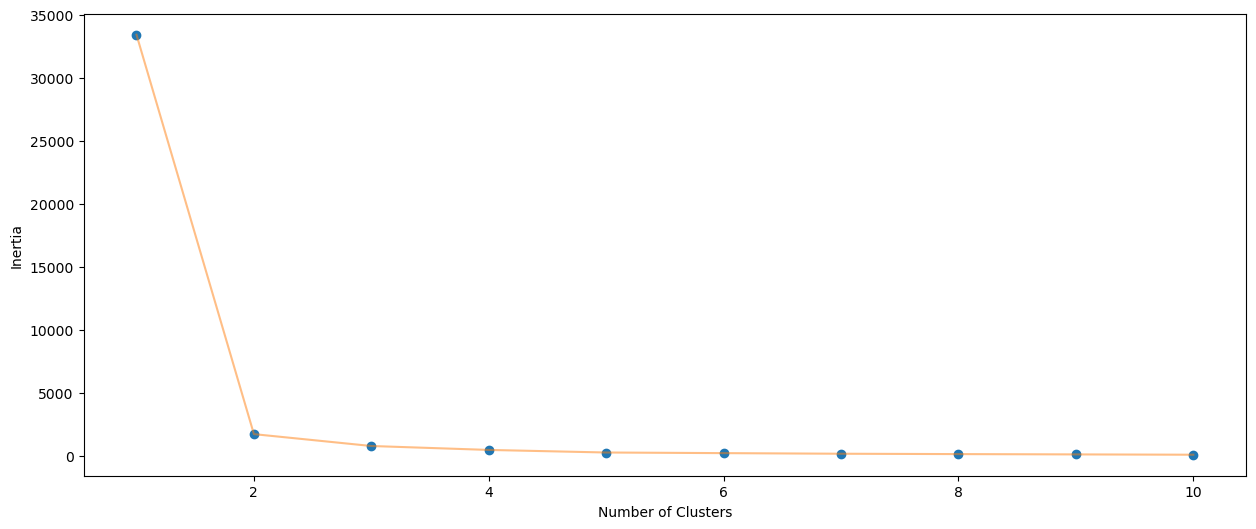

In [156]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [157]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [158]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

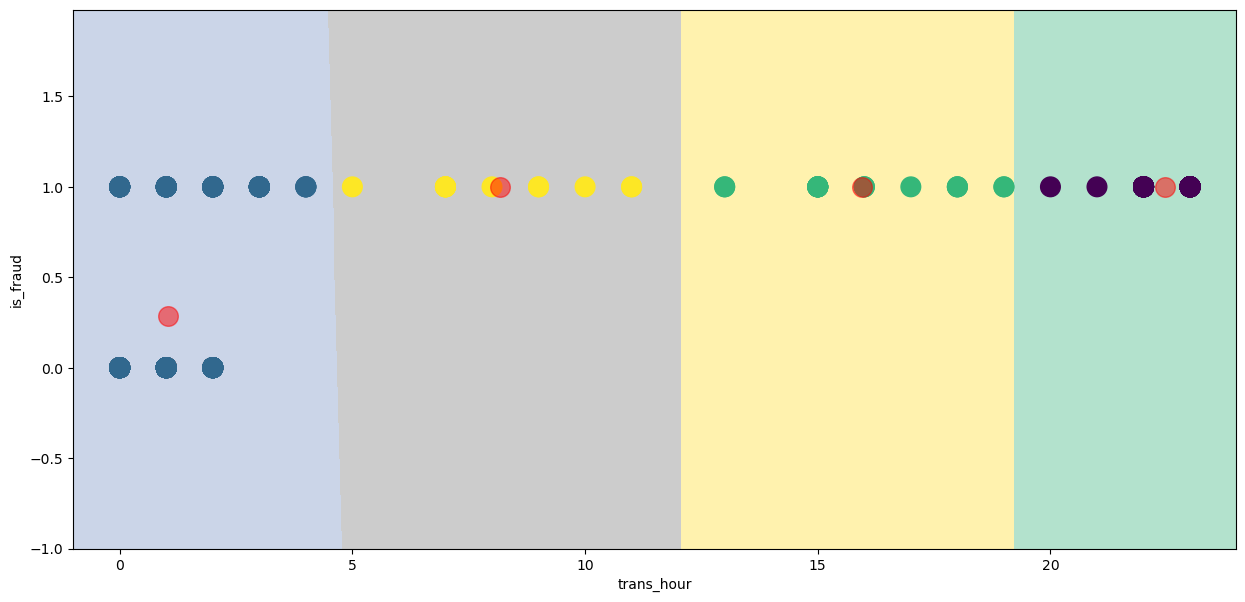

In [159]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'trans_hour' ,y = 'is_fraud' , data = temp , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 200 , c = 'red' , alpha = 0.5)
plt.ylabel('is_fraud') , plt.xlabel('trans_hour')
plt.show()

Segmentation using amt , trans_hour and is_fraud

In [126]:
X3 = temp[['amt' , 'trans_hour' ,'is_fraud']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

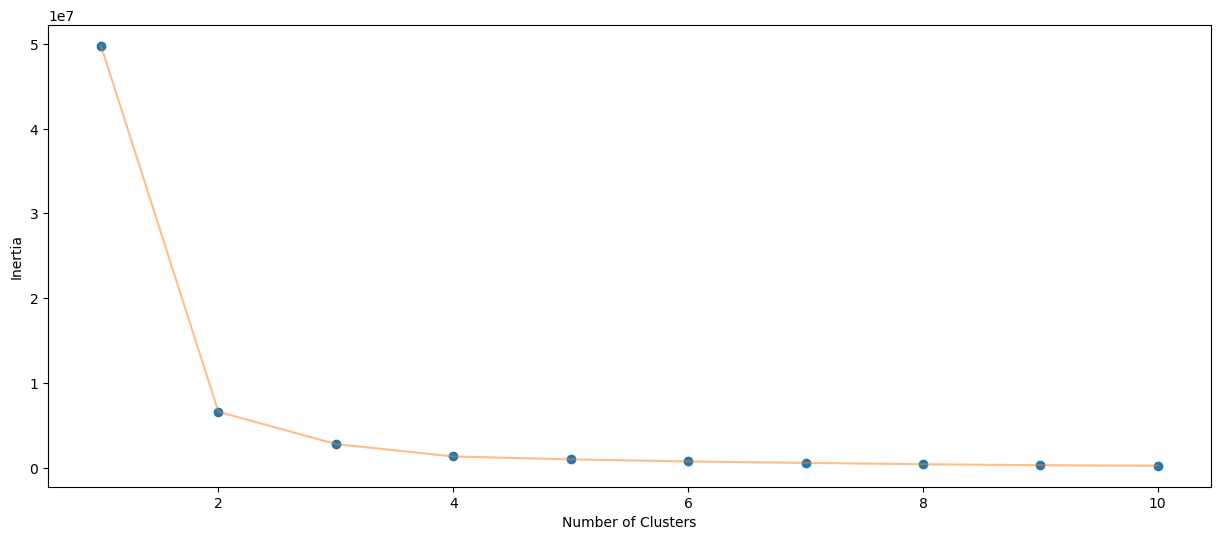

In [127]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [128]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [129]:
import plotly.graph_objs as go

temp['label3'] =  labels3
trace1 = go.Scatter3d(
    x= temp['amt'],
    y= temp['trans_hour'],
    z= temp['is_fraud'],
    mode='markers',
     marker=dict(
        color = temp['label3'], 
        size= 20,
        line=dict(
            color= temp['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'amt'),
            yaxis = dict(title  = 'trans_hour'),
            zaxis = dict(title  = 'is_fraud')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

Now that we are done with the EDA process we will now proceed with creating the dummy variables and encoding the features where ever require in our dataset

<b>Feature Encoding...


<b>Convert categorical variable into integers</b><br>
changing gender values to binary values



In [145]:
df.gender.value_counts()


AttributeError: 'DataFrame' object has no attribute 'gender'

In [144]:
df.gender=df.gender.apply(lambda x: 1 if x=="F" else 0)
df.gender.value_counts()

AttributeError: 'DataFrame' object has no attribute 'gender'

According to our EDA insights, we can now drop the variables not useful for model building

Based on our EDA above, we have found out that the features including transaction amout, credit card holder age, spending category, transaction time and locations all have varying degrees of correlations with credit card fraud. This helps us choose which features we want to include in our data models. The plan is to train the models on the training data set which we have analyzed above and then use the testing dataset to evaluate the model performance.

As data models need numeric input, we need to convert some of our categorical observations into numeric ones. For transaction locations and merchant locations, we already have the longitudinal and latitudinal data. But for shopping categories, we need convert them into dummy variables using pandas.get_dummies.
exaple: Category is Nominal Data that cannot work with model, So I will change category to numerical by One Hot Encoding



In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 44 columns):
 #   Column                       Dtype    
---  ------                       -----    
 0   cc_num                       int64    
 1   merchant                     object   
 2   amt                          float64  
 3   street                       object   
 4   city                         object   
 5   state                        object   
 6   zip                          int64    
 7   lat                          float64  
 8   long                         float64  
 9   city_pop                     int64    
 10  job                          object   
 11  trans_num                    object   
 12  unix_time                    int64    
 13  merch_lat                    float64  
 14  merch_long                   float64  
 15  is_fraud                     int64    
 16  trans_hour                   int64    
 17  trans_year_month             period[M]
 18  la

In [141]:
df = pd.get_dummies(df,columns=['category', 'gender', 'trans_day_of_week', 'age'],drop_first=True)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 44 columns):
 #   Column                       Dtype    
---  ------                       -----    
 0   cc_num                       int64    
 1   merchant                     object   
 2   amt                          float64  
 3   street                       object   
 4   city                         object   
 5   state                        object   
 6   zip                          int64    
 7   lat                          float64  
 8   long                         float64  
 9   city_pop                     int64    
 10  job                          object   
 11  trans_num                    object   
 12  unix_time                    int64    
 13  merch_lat                    float64  
 14  merch_long                   float64  
 15  is_fraud                     int64    
 16  trans_hour                   int64    
 17  trans_year_month             period[M]
 18  la

In [161]:
df.head()

cc_num                            merchant     amt  \
0  2703186189652095          fraud_Rippin, Kub and Mann    4.97   
1      630423337322     fraud_Heller, Gutmann and Zieme  107.23   
2    38859492057661                fraud_Lind-Buckridge  220.11   
3  3534093764340240  fraud_Kutch, Hermiston and Farrell   45.00   
4   375534208663984                 fraud_Keeling-Crist   41.96   

                         street            city state    zip      lat  \
0                561 Perry Cove  Moravian Falls    NC  28654  36.0788   
1  43039 Riley Greens Suite 393          Orient    WA  99160  48.8878   
2      594 White Dale Suite 530      Malad City    ID  83252  42.1808   
3   9443 Cynthia Court Apt. 038         Boulder    MT  59632  46.2306   
4              408 Bradley Rest        Doe Hill    VA  24433  38.4207   

       long  city_pop  ... trans_day_of_week_Monday  \
0  -81.1781      3495  ...                        0   
1 -118.2105       149  ...                        0   
2 -112.2620      4154  ...                        0   
3 -112.1138      1939  ...                        0   
4  -79.4629        99  ...                        0   

  trans_day_of_week_Saturday  trans_day_of_week_Sunday  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          0                         0   

   trans_day_of_week_Thursday  trans_day_of_week_Tuesday  \
0                           0                          1   
1                           0                          1   
2                           0                          1   
3                           0                          1   
4                           0                          1   

   trans_day_of_week_Wednesday  age_46-60 age_61-75  age_< 30  age_> 75  
0                            0          0         0         0         0  
1                            0          0         0         0         0  
2                            0          1         0         0         0  
3                            0          1         0         0         0  
4                            0          0         0         0         0  

[5 rows x 44 columns]

remove....In the above df1 Dataframe, the feature 'merchant' can be dropped since it has lot of unique values and it is hard to encode all of them. And the same applies to the variables - 'street', 'city', 'state' and 'job'
Similarly, the variables - 'age', 'category', 'gender', 'trans_day_of_week' can also be dropped since they have already been encoded.

Now, some features like 'cc_num', 'first', 'last', 'trans_num' are not significant in context of our analysis and hence can be removed.

In [162]:
drop_cols = ['cc_num', 'trans_num', 'merchant', 'street','city','state','job','lat','long','merch_lat','merch_long']
df=df.drop(drop_cols,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 33 columns):
 #   Column                       Dtype    
---  ------                       -----    
 0   amt                          float64  
 1   zip                          int64    
 2   city_pop                     int64    
 3   unix_time                    int64    
 4   is_fraud                     int64    
 5   trans_hour                   int64    
 6   trans_year_month             period[M]
 7   latitudinal_distance         float64  
 8   longitudinal_distance        float64  
 9   category_food_dining         uint8    
 10  category_gas_transport       uint8    
 11  category_grocery_net         uint8    
 12  category_grocery_pos         uint8    
 13  category_health_fitness      uint8    
 14  category_home                uint8    
 15  category_kids_pets           uint8    
 16  category_misc_net            uint8    
 17  category_misc_pos            uint8    
 18  ca

In [163]:
print(df.shape)
df.columns

(1852394, 33)


Index(['amt', 'zip', 'city_pop', 'unix_time', 'is_fraud', 'trans_hour',
       'trans_year_month', 'latitudinal_distance', 'longitudinal_distance',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_1', 'trans_day_of_week_Monday', 'trans_day_of_week_Saturday',
       'trans_day_of_week_Sunday', 'trans_day_of_week_Thursday',
       'trans_day_of_week_Tuesday', 'trans_day_of_week_Wednesday', 'age_46-60',
       'age_61-75', 'age_< 30', 'age_> 75'],
      dtype='object')

C:\Users\Admin\AppData\Local\Temp\ipykernel_5668\1493179403.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_random_under_corr = df.corr()


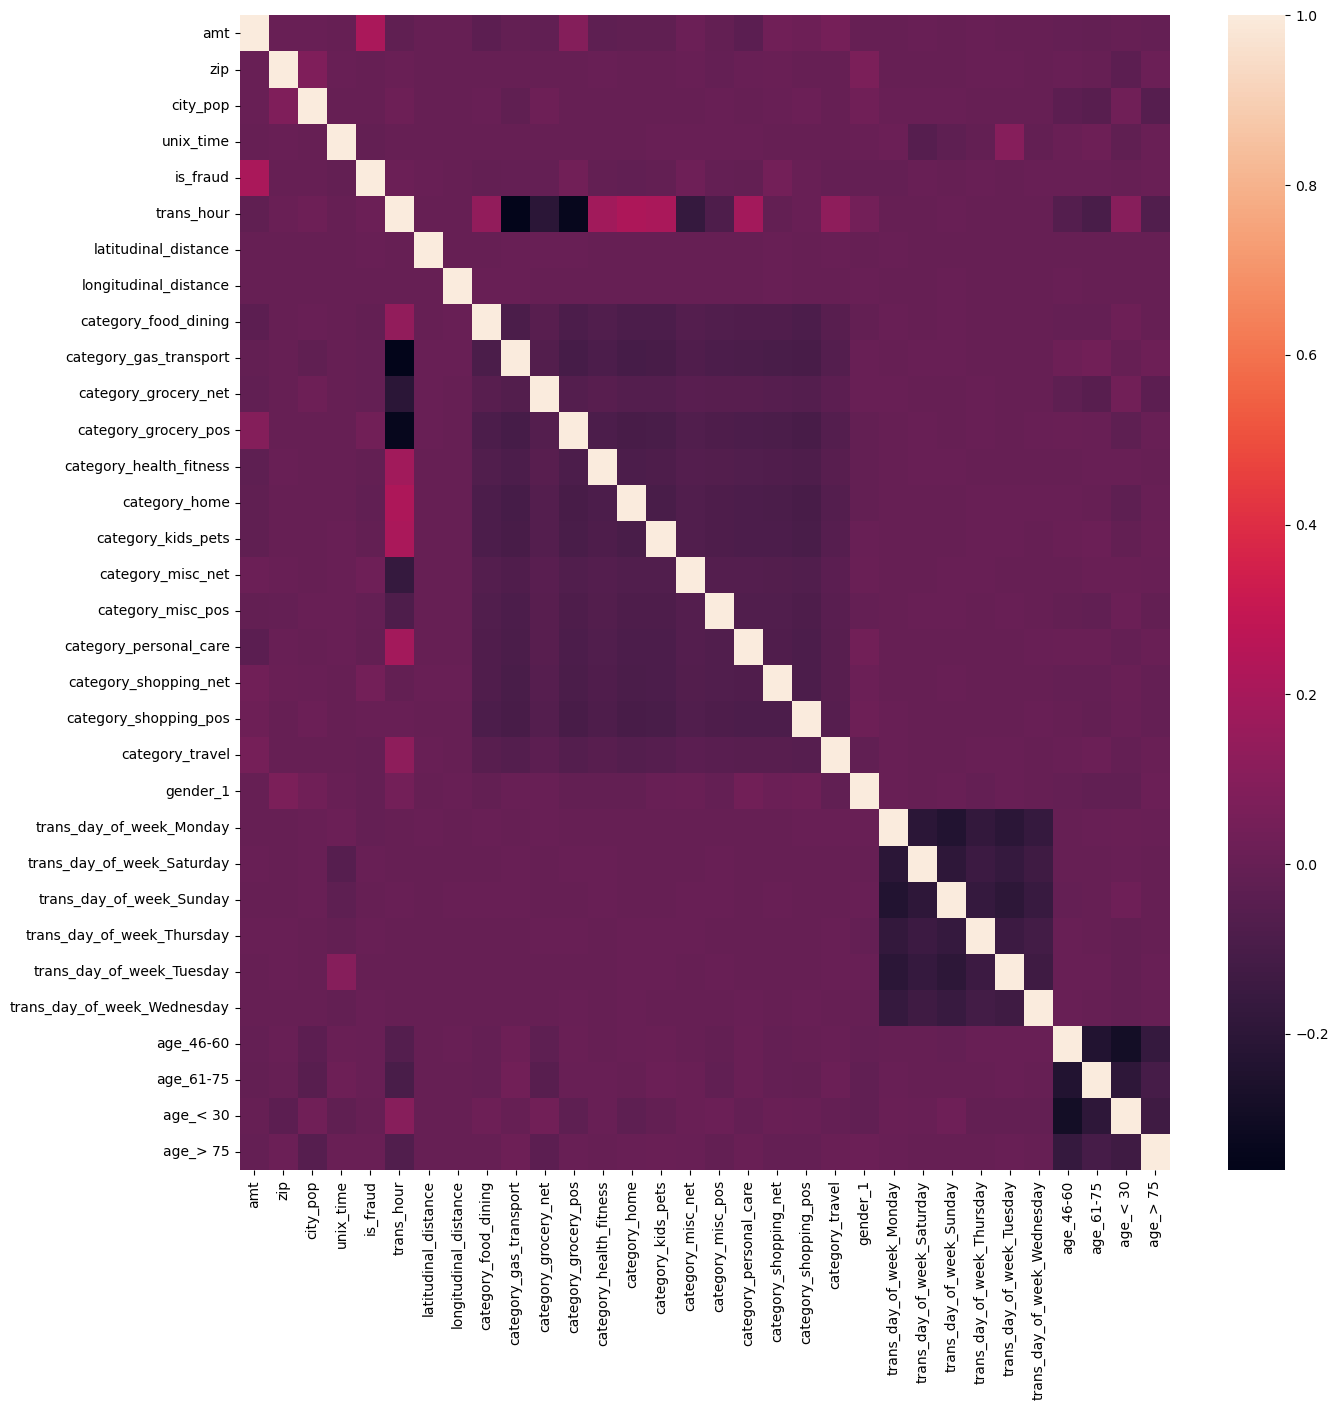

In [65]:
#let us now check the correlations between the columns
df_random_under_corr = df.corr()
#plotting the correlation heatplot
plt.figure(figsize=(15,15))
sns.heatmap(df_random_under_corr)
plt.show()


Step - 5: Implementing Algorithms

In [166]:
#storing the number of values in each class
non_fraud_count, fraud_count = df.is_fraud.value_counts()

In [167]:
#storing the numerical columns of the data and removing unnecessary variables
df_num = df.select_dtypes(include='number')
df_num.drop(['zip', 'city_pop', 'unix_time'],
            axis=1, inplace=True)
df_num.columns

Index(['amt', 'is_fraud', 'trans_hour', 'latitudinal_distance',
       'longitudinal_distance', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_1',
       'trans_day_of_week_Monday', 'trans_day_of_week_Saturday',
       'trans_day_of_week_Sunday', 'trans_day_of_week_Thursday',
       'trans_day_of_week_Tuesday', 'trans_day_of_week_Wednesday', 'age_46-60',
       'age_61-75', 'age_< 30', 'age_> 75'],
      dtype='object')

In [168]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 29 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   amt                          float64
 1   is_fraud                     int64  
 2   trans_hour                   int64  
 3   latitudinal_distance         float64
 4   longitudinal_distance        float64
 5   category_food_dining         uint8  
 6   category_gas_transport       uint8  
 7   category_grocery_net         uint8  
 8   category_grocery_pos         uint8  
 9   category_health_fitness      uint8  
 10  category_home                uint8  
 11  category_kids_pets           uint8  
 12  category_misc_net            uint8  
 13  category_misc_pos            uint8  
 14  category_personal_care       uint8  
 15  category_shopping_net        uint8  
 16  category_shopping_pos        uint8  
 17  category_travel              uint8  
 18  gender_1                     uint8  
 19  

<b>Feature Scaling</b><br>
as we can see, now our data contains only numerical feilds

In [169]:
from sklearn.preprocessing import StandardScaler

#innput-output split
X = df_num.drop(['is_fraud'],axis=1)
y = df_num.is_fraud

#scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)


Logistic Regression

In [170]:
from sklearn.model_selection import StratifiedKFold

#train-test split using stratified K fold
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X,y)

for train_index, test_index in skf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

y_train.value_counts()

0    921372
1      4825
Name: is_fraud, dtype: int64

As it can be seen, the classes in the target variable are imbalance. We need to fix this later.

lets see what happens when working with the imbalanced dataset

In [171]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
model = lr.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print('y_train_pred: ',y_train_pred)
y_test_pred = model.predict(X_test)
print('y_test_pred: ', y_test_pred)

y_train_pred:  [0 0 0 ... 0 0 0]
y_test_pred:  [0 0 0 ... 0 0 0]


In [172]:
from sklearn import metrics
from sklearn.metrics import precision_score, accuracy_score, f1_score, r2_score

#evaluating the model
model_name = 'Logistic Regression - without balancing'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(y_test,y_test_pred)
f_score = f1_score(y_test, y_test_pred, average='weighted')
precision = precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test,y_test_pred)
#creating a dataframe to compare the performance of different models
model_eval_data = [[model_name, train_score, test_score, acc_score, f_score, precision, recall]]
evaluate_df = pd.DataFrame(model_eval_data, columns=['Model Name', 'Training Score', 'Testing Score', 'Accuracy',
                                          'F1 Score', 'Precision', 'Recall'])
evaluate_df

Model Name  Training Score  Testing Score  \
0  Logistic Regression - without balancing        0.994443        0.99443   

   Accuracy  F1 Score  Precision    Recall  
0   0.99443  0.992035   0.033613  0.002487

Impacts of Imbalance:
From the above dataframe it can be seen that although we have not balanced the classes in our target variable, the accuracy and several other metrics seem to look great.
This is because, since there is no balance in the dataset at this point, the model predicts almost all data points as 'not fraud'.
This does not clearly satify our motive hence, we need to balance the classes in the target variable in order build a fair model.
!if we try and predict for a fraud transaction we will not have good accuracy, and will predict most of them as not fraud. so we need to balance our dataset

Feature Balancing
in this, we will only use the X_train and y_train obtained from the stratified k-Fold split that we have obtained above and use the X_test and y_test to test our models on unseen data.
We will also only balance the data points in X_train and y_train datasets and test our model upon the imbalanced data of X_test and y_test.
Hence, we will store X_test and y_test as test_input and test_output for better understanding.

In [174]:
#renaming X_test and y_test variables
test_input = X_test.copy()
test_output = y_test.copy()

test_output.value_counts(normalize=True)

0    0.994789
1    0.005211
Name: is_fraud, dtype: float64

In [175]:
#storing all fraud transactions
fraud_trans = df_num[df_num['is_fraud'] == 1]
non_fraud_trans = df_num[df_num['is_fraud'] == 0]

print('fraud data shape: ', fraud_trans.shape)
print('non fraud data shape: ', non_fraud_trans.shape)

#printing fraud data percentage
print('Fraud Data percentage: ', 100*(len(fraud_trans)/len(non_fraud_trans)))

fraud data shape:  (9651, 29)
non fraud data shape:  (1842743, 29)
Fraud Data percentage:  0.5237301132062366


In [176]:
import plotly.express as px

labels=["Genuine","Fraud"]

fig = px.pie(values=df["is_fraud"].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs NonFraud transactions")
fig.show()

Notes:

it can be observed from the above step that the dataframe is highly imbalanced.
the number of fraudulent transactions are only about 0.5% of the total dataset.
This imbalance might create bias in our model building process
Therefore, we will have to balance the dataset by performing oversampling or undersampling.
And, we will use the stratified k-fold cross validation for training and validating our model with each algorithm used to build the model.
We can use 2 methods for handling imbalanced data: 1) Undersampling and 2)Oversampling.

For select features I would like to do 2 experiments: ExtraTreesClassifier, .abs().nlargest(), because i would like to find the best acurrency and the best prediction

So, This project I will try and compare for my reader


SMOTE Technique (Over-Sampling):
<img src="https://raw.githubusercontent.com/rikunert/SMOTE_visualisation/master/SMOTE_R_visualisation_3.png", width=800> SMOTE stands for Synthetic Minority Over-sampling Technique. Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems".

Understanding SMOTE:

Solving the Class Imbalance: SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.
Location of the synthetic points: SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.
Final Effect: More information is retained since we didn't have to delete any rows unlike in random undersampling.
Accuracy || Time Tradeoff: Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.
Cross Validation Overfitting Mistake:
Overfitting during Cross Validation:
In our undersample analysis I want to show you a common mistake I made that I want to share with all of you. It is simple, if you want to undersample or oversample your data you should not do it before cross validating. Why because you will be directly influencing the validation set before implementing cross-validation causing a "data leakage" problem. In the following section you will see amazing precision and recall scores but in reality our data is overfitting!

The Wrong Way:




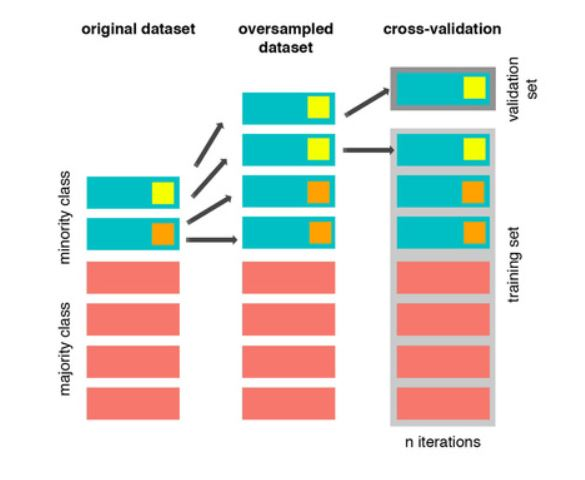

As mentioned previously, if we get the minority class ("Fraud) in our case, and create the synthetic points before cross validating we have a certain influence on the "validation set" of the cross validation process. Remember how cross validation works, let's assume we are splitting the data into 5 batches, 4/5 of the dataset will be the training set while 1/5 will be the validation set. The test set should not be touched! For that reason, we have to do the creation of synthetic datapoints "during" cross-validation and not before, just like below:

The Right Way:

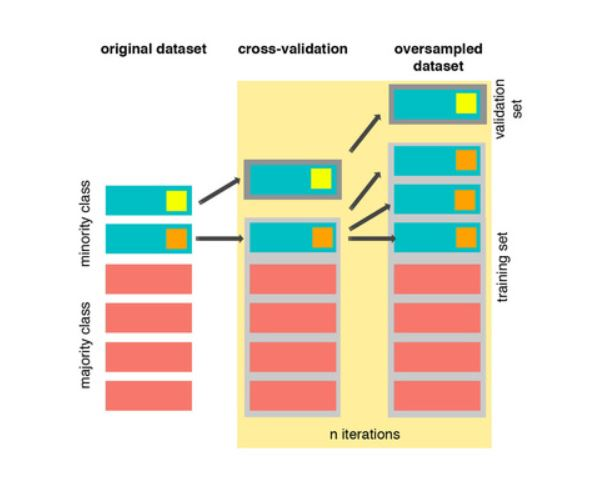



As you see above, SMOTE occurs "during" cross validation and not "prior" to the cross validation process. Synthetic data are created only for the training set without affecting the validation set.

References:

DEALING WITH IMBALANCED DATA: UNDERSAMPLING, OVERSAMPLING AND PROPER CROSS-VALIDATION
SMOTE explained for noobs
Machine Learning - Over-& Undersampling - Python/ Scikit/ Scikit-Imblearn

Now with both datasets cleaned and organized, we can start building models with them. We will first try to use Logistic Regression combined with confusion matrix to evaluate the model. As is very common with fraud data, there is always the issue of class imbalance where actual fraud cases are way fewer than normal cases and constitute only a very small part of the dataset. To counter this imbalance, it's important to use the SMOTE (Synthetic Minority Oversampling Technique) method to resample the training dataset so that the model can be trained on more balanced data for better results.

In [ ]:
#logistic regression
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

method= SMOTE()
X_resampled, y_resampled = method.fit_resample(X_train, y_train)
model=LogisticRegression()
model.fit(X_resampled,y_resampled)
predicted=model.predict(X_test)
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print('Share of Non-Fraud in Test Data:', 1-round(y_test.sum()/len(y_test),4))

In [179]:
!pip install imblearn

     ------------------------------------ 226.0/226.0 kB 767.8 kB/s eta 0:00:00
     ------------------------------------ 298.0/298.0 kB 836.4 kB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


<b>Random Under Sampling 1,5<br>
Random Over Sampling 6,10<br>
SMOTE 7,11

In [180]:

#modules for model building
#algorithms for sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE


Logistic Regression - Random Under Sampling	

1) Undersampling - Random Undersampling:

for this, we will use the sample method to randomly choose the total number of data points from majority class as in the minority class.

In [181]:
#random under sampling using imblearn
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train,y_train)

y_rus.value_counts()

0    4825
1    4825
Name: is_fraud, dtype: int64

Now, we will do the train-test split with the argument 'stratify' in the method equal to our target variable, in order to have equal number of samples from each class in our split.
Train-Test Split:

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.3, random_state=42, stratify=y_rus)
y_train.value_counts()

1    3378
0    3377
Name: is_fraud, dtype: int64

Let us now build a baseline Linear model to analyze this data after undersampling .



In [183]:
#creating a baseline linear model
lr = LogisticRegression(random_state=42)
#model
model = lr.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_train_pred

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [184]:
#predicting on imbalanced test data
test_pred=model.predict(test_input)
test_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [185]:
#printing the classification report of the model
print(classification_report(test_output,test_pred))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93    921371
           1       0.03      0.76      0.06      4826

    accuracy                           0.87    926197
   macro avg       0.51      0.81      0.49    926197
weighted avg       0.99      0.87      0.93    926197



In [188]:
#evaluating the model
model_name = 'Logistic Regression - Random Under Sampling'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

Model Name  Training Score  Testing Score  \
0      Logistic Regression - without balancing        0.994443       0.994430   
1  Logistic Regression - Random Under Sampling        0.814064       0.814853   
2  Logistic Regression - Random Under Sampling        0.814064       0.814853   
3  Logistic Regression - Random Under Sampling        0.814064       0.814853   

   Accuracy  F1 Score  Precision    Recall  
0  0.994430  0.992035   0.033613  0.002487  
1  0.870011  0.925645   0.029691  0.755906  
2  0.870011  0.925645   0.029691  0.755906  
3  0.870011  0.925645   0.029691  0.755906

keras using randum under sampeling

In [189]:
from keras import models, layers
from keras.callbacks import EarlyStopping

In [190]:
model = models.Sequential()

model.add(layers.Dense(10, input_shape=(X_train.shape[1],), activation='relu'))

model.add(layers.Dense(8, activation='relu'))

model.add(layers.Dense(6, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [201]:
from sklearn.metrics import classification_report
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [202]:
from sklearn.utils.class_weight import compute_class_weight
class_weight = compute_class_weight(class_weight="balanced",classes=np.unique(y_train),y=y_train)
class_weight

array([1.00014806, 0.99985198])

In [203]:
weights = {
    0:0.5,
    1:300
}

callback = EarlyStopping(monitor='loss', patience=3)

In [206]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=10, 
                    batch_size=64,
                    validation_data=(X_test, y_test),
                    class_weight = weights,
                   callbacks=[callback])

Epoch 1/10
106/106 [==============================] - 0s 3ms/step - loss: 0.3320 - accuracy: 0.8913 - val_loss: 0.5807 - val_accuracy: 0.8922
Epoch 2/10
106/106 [==============================] - 0s 4ms/step - loss: 0.3335 - accuracy: 0.8909 - val_loss: 0.6031 - val_accuracy: 0.8905
Epoch 3/10
106/106 [==============================] - 0s 3ms/step - loss: 0.3297 - accuracy: 0.8934 - val_loss: 0.5981 - val_accuracy: 0.8926
Epoch 4/10
106/106 [==============================] - 0s 3ms/step - loss: 0.3244 - accuracy: 0.8936 - val_loss: 0.5666 - val_accuracy: 0.8964
Epoch 5/10
106/106 [==============================] - 0s 3ms/step - loss: 0.3234 - accuracy: 0.8959 - val_loss: 0.5757 - val_accuracy: 0.8946
Epoch 6/10
106/106 [==============================] - 0s 3ms/step - loss: 0.3271 - accuracy: 0.8940 - val_loss: 0.6033 - val_accuracy: 0.8915
Epoch 7/10
106/106 [==============================] - 0s 3ms/step - loss: 0.3232 - accuracy: 0.8940 - val_loss: 0.6218 - val_accuracy: 0.8905
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


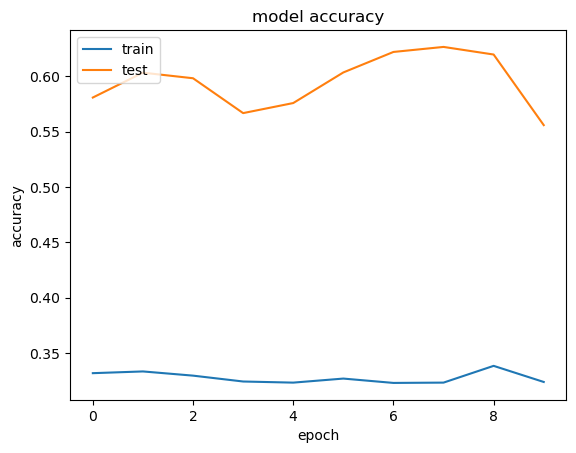

In [207]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [208]:
val_predictions = model.predict(X_test)
print(val_predictions)
preds = np.around(val_predictions)

91/91 [==============================] - 0s 1ms/step
[[9.9999940e-01]
 [3.2995725e-01]
 [9.3712754e-07]
 ...
 [1.5181610e-06]
 [1.0000000e+00]
 [4.6726774e-16]]


In [209]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.99      0.80      0.89      1448
           1       0.83      1.00      0.91      1447

    accuracy                           0.90      2895
   macro avg       0.91      0.90      0.90      2895
weighted avg       0.91      0.90      0.90      2895



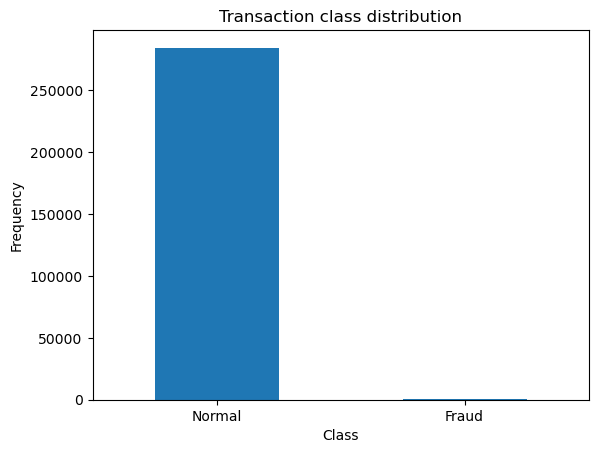

In [7]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), ["Normal", "Fraud"])
plt.xlabel("Class")
plt.ylabel("Frequency");

Notice how the data is totally unbalanced, We can see that an overwhelming majority of the transactions are non-fraud. If we use this dataframe for predicting we might get a lot of errors and our algorithms will probably overfit by assuming that most transactions are not fraud. so we will want to balance our dataset before making any predictions.

In [25]:
fraud = df[df.Class == 1]
normal = df[df.Class == 0]
print(f'Normal transactions: {len(normal)} out of {len(df)}, {round(len(normal)/len(df) * 100,3)} % of the dataset')
print(f'Fraud transactions:  {len(fraud)} out of {len(df)}, {round(len(fraud)/len(df) * 100,3)} % of the dataset')

Normal transactions: 284315 out of 284807, 99.827 % of the dataset
Fraud transactions:  492 out of 284807, 0.173 % of the dataset


<h2>*** learn more about our data, compare Fraud/Normal features time and amount to see what we can learn about our data***

<h2><b>Pre-process our data

First, we will scale Time and Amount like the other columns, using sklearn's StandardScaler.
.



In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = df.drop('Class', axis=1)
y = df.Class

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, 
                                                            test_size=0.2, random_state=42)

X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)


We have divided our data into training, validation and testing groups. sum(training+validation+testing) = sum(df)

In [49]:
print(f"TRAINING:\n     x_train: {X_train.shape[0]}\n     y_train: {y_train.shape[0]}\n")
print(f"VALIDATION:\n     x_validate: {X_validate.shape[0]}\n     y_validate: {y_validate.shape[0]}\n")
print(f"TESTING:\n     x_test: {X_test.shape[0]}\n     y_test: {y_test.shape[0]}\n")

TRAINING:
     x_train: 159491
     y_train: 159491

VALIDATION:
     x_validate: 39873
     y_validate: 39873

TESTING:
     x_test: 85443
     y_test: 85443



In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_result(label, prediction, train=True):
    print(f"Train Result:\nAccuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
    report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
    print(f"Classification Report:\n{report}")
    if train:
        print(f"Confusion Matrix: {confusion_matrix(y_train, prediction)}\n")
    else:
        print(f"Confusion Matrix: {confusion_matrix(label, prediction)}\n") 

<h2>*** continue processing our data, need to equalize the data, work on balancing the data... then would probably need to fix what wrote above and reference it to the new balanced dataset***

Once we finished preprocessing our data - we are off to building our model!

<h2><b>Building our model using Keras!


<b>eather use the functional model: (work on it...fix)

In [73]:
input_layer = Input(shape=(X_train.shape[-1], ))

encoder = Dense(256, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(256, activation="relu")(encoder)

decoder = Dense(256, activation='tanh')(encoder)
decoder = Dense(X_train.shape[-1], activation='relu')(decoder)

func_model = Model(inputs=input_layer, outputs=decoder)

func_model.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense_48 (Dense)            (None, 256)               7936      
                                                                 
 dense_49 (Dense)            (None, 256)               65792     
                                                                 
 dense_50 (Dense)            (None, 256)               65792     
                                                                 
 dense_51 (Dense)            (None, 30)                7710      
                                                                 
Total params: 147,230
Trainable params: 147,230
Non-trainable params: 0
_________________________________________________________________


In [76]:
func_model.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

In [81]:
callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]

history = func_model.fit(X_train, X_train,
                    epochs=10,
                    batch_size=32,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=callbacks).history

Epoch 1/10
4985/4985 [==============================] - 20s 4ms/step - loss: 0.5375 - accuracy: 0.9125 - val_loss: 0.5418 - val_accuracy: 0.8973
Epoch 2/10
4985/4985 [==============================] - 20s 4ms/step - loss: 0.5385 - accuracy: 0.9139 - val_loss: 0.5189 - val_accuracy: 0.9271
Epoch 3/10
4985/4985 [==============================] - 20s 4ms/step - loss: 0.5354 - accuracy: 0.9134 - val_loss: 0.5173 - val_accuracy: 0.9376
Epoch 4/10
4985/4985 [==============================] - 20s 4ms/step - loss: 0.5344 - accuracy: 0.9175 - val_loss: 0.5158 - val_accuracy: 0.9182
Epoch 5/10
4985/4985 [==============================] - 20s 4ms/step - loss: 0.5353 - accuracy: 0.9160 - val_loss: 0.5202 - val_accuracy: 0.9155
Epoch 6/10
4985/4985 [==============================] - 20s 4ms/step - loss: 0.5335 - accuracy: 0.9171 - val_loss: 0.5189 - val_accuracy: 0.9113
Epoch 7/10
4985/4985 [==============================] - 20s 4ms/step - loss: 0.5320 - accuracy: 0.9162 - val_loss: 0.5176 - val_ac

we can see the the loss rate is high, seems like it is because our data is still unbalanced and in addition we need to still eork more on our model... those are our plans for the upcoming weeks:) 

<b>or use the sequential model:(work on it...fix)

In [67]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()
keras.utils.plot_model(model)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 256)               7936      
                                                                 
 batch_normalization_18 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dropout_18 (Dropout)        (None, 256)               0         
                                                                 
 dense_45 (Dense)            (None, 256)               65792     
                                                                 
 batch_normalization_19 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dropout_19 (Dropout)        (None, 256)              

<h2>*** continue building the model </h2>(plot_model doesnt work yet..)***

<h2>*** work on compile fit predict***

As you can see, there is a lot more work to be done on this project, that is our plan for the upcoming weeks:)...